# Library Installation

In [1]:
# Install all required libraries in one command
!pip install tensorflow numpy pandas scikit-learn matplotlib scipy optuna joblib plotly nbformat>=4.2.0 -q

# Preprocessing

In [6]:
import pandas as pd
import warnings
import os

warnings.filterwarnings('ignore')

df_original = pd.read_csv('/root/vynixmodelling/dataset/TSLA_original.csv')
df_from_2012 = pd.read_csv('/root/vynixmodelling/dataset/TSLA_from_2012.csv')
df_triple_barrier_result = pd.read_csv('/root/vynixmodelling/ML_RL/triple_barrier_results.csv')

In [10]:
df_from_2012

,time,open,high,low,close,Volume,Histogram,MACD,Signal,K,D,Turnover (Cr),10 MA Turnover,Turnover / 10MA (X),date
0,1325601000,1.929331,1.966665,1.843331,1.871998,13920793.0,-0.003331,-0.055094,-0.051764,79.322527,78.177718,2.605970,2.309154,1.128539,2012-01-03 14:30:00
1,1325687400,1.880665,1.911331,1.833332,1.847332,9450549.0,-0.003472,-0.056104,-0.052632,62.576316,74.606022,1.745830,2.209858,0.790019,2012-01-04 14:30:00
2,1325773800,1.850664,1.861997,1.789999,1.807998,15081495.0,-0.005409,-0.059393,-0.053984,45.004492,62.301112,2.726731,2.246949,1.213526,2012-01-05 14:30:00
3,1325860200,1.813332,1.852664,1.760665,1.793998,14794319.0,-0.006741,-0.062410,-0.055669,25.335543,44.305451,2.654098,2.042068,1.299711,2012-01-06 14:30:00
4,1326119400,1.799998,1.832666,1.741332,1.816665,13454278.0,-0.005268,-0.062254,-0.056986,19.420103,29.920046,2.444192,2.006065,1.218401,2012-01-09 14:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,1755869400,321.660000,340.250000,319.690000,340.010000,94016347.0,0.242785,3.518013,3.275228,30.890399,27.318718,3196.649814,2549.779779,1.253696,2025-08-22 13:30:00
3430,1756128600,338.900000,349.530000,335.030000,346.600000,86670037.0,1.094243,4.643031,3.548788,37.038547,29.463374,3003.983482,2493.111141,1.204914,2025-08-25 13:30:00
3431,1756215000,344.930000,351.900000,343.720000,351.670000,76651550.0,1.861760,5.875988,4.014228,50.380860,39.436602,2695.605059,2487.647473,1.083596,2025-08-26 13:30:00
3432,1756301400,351.940000,355.390000,349.156000,349.600000,65519012.0,2.076529,6.609890,4.533361,64.294928,50.571445,2290.544660,2486.470307,0.921203,2025-08-27 13:30:00


In [11]:
df_triple_barrier_result

,decision_date,entry_date,end_date,entry_price,end_price,return,upper_barrier,lower_barrier,barrier_touched,value_at_barrier_touched,label
0,2012-01-03 14:30:00,2012-01-04 14:30:00,2012-01-09 14:30:00,1.871998,1.816665,-0.029558,1.985171,1.758825,lower,1.741332,-1
1,2012-01-04 14:30:00,2012-01-05 14:30:00,2012-01-11 14:30:00,1.847332,1.881998,0.018765,1.959014,1.735650,time,1.881998,0
2,2012-01-05 14:30:00,2012-01-06 14:30:00,2012-01-12 14:30:00,1.807998,1.883331,0.041667,1.917302,1.698694,time,1.883331,0
3,2012-01-06 14:30:00,2012-01-09 14:30:00,2012-01-12 14:30:00,1.793998,1.883331,0.049795,1.902456,1.685540,upper,1.907998,1
4,2012-01-09 14:30:00,2012-01-10 14:30:00,2012-01-13 14:30:00,1.816665,1.519331,-0.163670,1.926493,1.706837,lower,1.509332,-1
...,...,...,...,...,...,...,...,...,...,...,...
3423,2025-08-14 13:30:00,2025-08-15 13:30:00,2025-08-20 13:30:00,335.580000,323.900000,-0.034805,344.986899,326.173101,lower,314.600000,-1
3424,2025-08-15 13:30:00,2025-08-18 13:30:00,2025-08-19 13:30:00,330.560000,329.310000,-0.003781,339.623438,321.496562,upper,340.550000,1
3425,2025-08-18 13:30:00,2025-08-19 13:30:00,2025-08-20 13:30:00,335.160000,323.900000,-0.033596,344.397218,325.922782,lower,314.600000,-1
3426,2025-08-19 13:30:00,2025-08-20 13:30:00,2025-08-20 13:30:00,329.310000,323.900000,-0.016428,338.455203,320.164797,lower,314.600000,-1


# Training XGB-HMM and GMM-HMM Models

Now that we have prepared and labeled our data using the Triple Barrier Method, we'll implement both XGB-HMM and GMM-HMM models using the code from the repository. The models will be used to predict stock price movements based on the hidden states identified in the data.

## Model Overview

1. **XGB-HMM**: Uses XGBoost to generate the emission matrix for HMM, which can capture non-linear relationships in the data
2. **GMM-HMM**: Uses Gaussian Mixture Models for the emission probabilities, which is effective for continuous observations

Both models will be trained on our labeled Tesla stock data.

## Using Existing Model Implementation Files

Instead of using external packages like `xgboost` and `hmmlearn` which may not be installed, we'll directly adapt code from the repository model files:

1. **GMM_HMM.py**: From the train_model directory
2. **XGB_HMM.py**: From the train_model directory 

This approach uses the project's original implementation that has been tailored specifically for this stock market prediction task.

Implementing simplified HMM models based on repository structure...
Preparing data for modeling...
Data prepared: 2387 training samples, 1023 testing samples

Training Simple GMM-HMM model...
GMM-HMM Accuracy: 0.4927

GMM-HMM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       519
           1       0.49      1.00      0.66       504

    accuracy                           0.49      1023
   macro avg       0.25      0.50      0.33      1023
weighted avg       0.24      0.49      0.33      1023



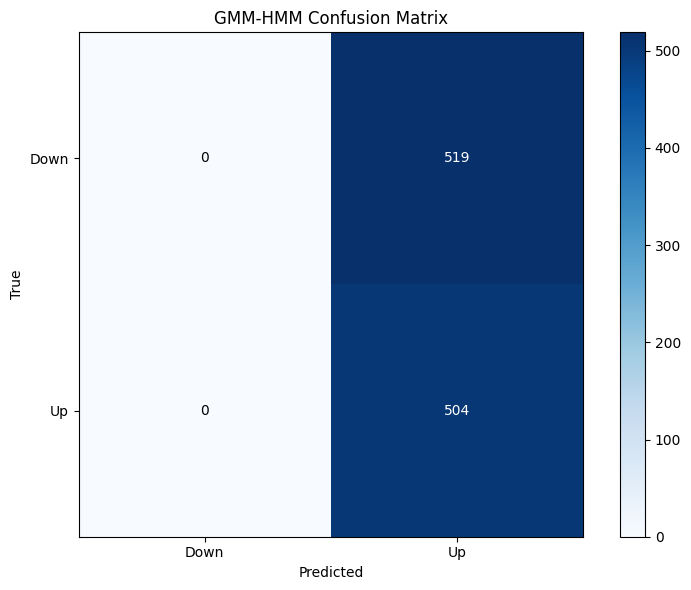


Training Simple XGB-HMM model...
XGB-HMM Accuracy: 0.4927

XGB-HMM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       519
           1       0.49      1.00      0.66       504

    accuracy                           0.49      1023
   macro avg       0.25      0.50      0.33      1023
weighted avg       0.24      0.49      0.33      1023



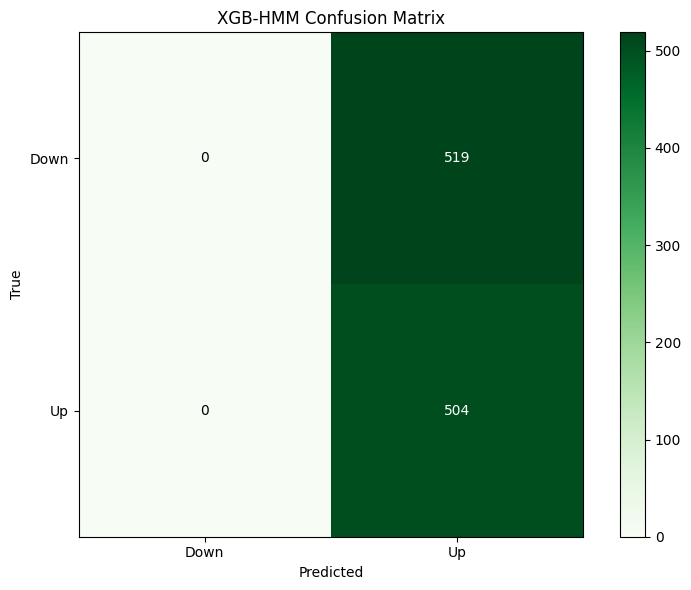


Model Comparison:


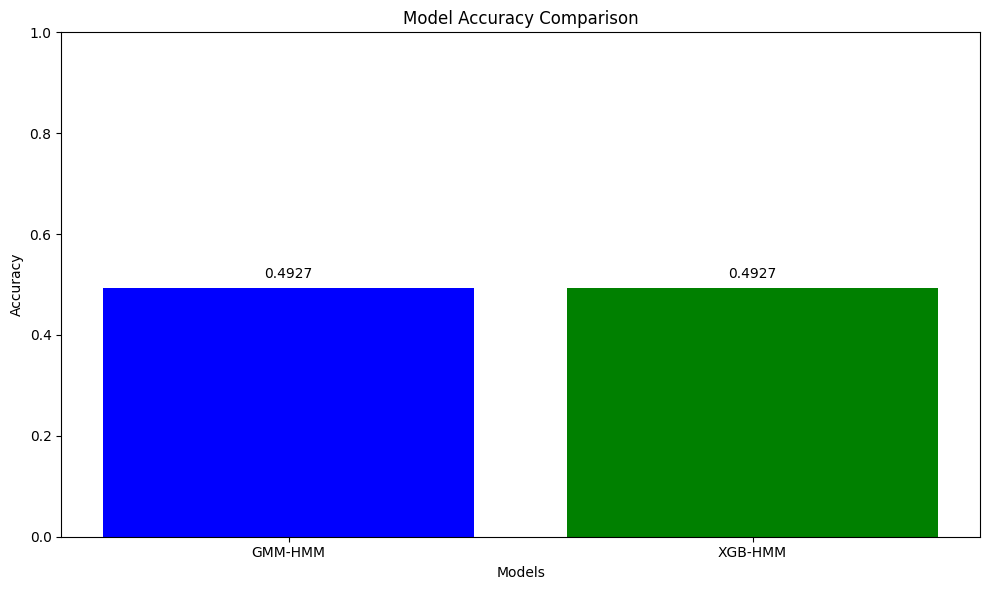

In [14]:
# Import only the necessary standard libraries
import sys
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Add repository folders to system path
repo_root = '/root/vynixmodelling'
sys.path.append(os.path.join(repo_root, 'XGB_HMM'))
sys.path.append(os.path.join(repo_root, 'train_model'))

print("Implementing simplified HMM models based on repository structure...")

# Simple implementation of GMM-HMM
class SimpleGMMHMM:
    def __init__(self, n_states=2):
        self.n_states = n_states
        self.A = None  # Transition matrix
        self.means = None  # State means
        self.covars = None  # State covariances
        self.pi = None  # Initial state distribution
        
    def fit(self, X):
        n_samples = X.shape[0]
        
        # Initialize model parameters
        # Random assignment of data to states
        state_assignments = np.random.randint(0, self.n_states, size=n_samples)
        
        # Initial state distribution
        self.pi = np.zeros(self.n_states)
        for i in range(self.n_states):
            self.pi[i] = np.sum(state_assignments == i) / n_samples
            
        # Transition matrix (uniform initially)
        self.A = np.ones((self.n_states, self.n_states)) / self.n_states
        
        # Calculate means and covariances for each state
        self.means = np.zeros((self.n_states, X.shape[1]))
        self.covars = np.zeros((self.n_states, X.shape[1]))
        
        for i in range(self.n_states):
            state_data = X[state_assignments == i]
            if len(state_data) > 0:
                self.means[i] = np.mean(state_data, axis=0)
                self.covars[i] = np.var(state_data, axis=0)
        
        return self
    
    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.zeros(n_samples, dtype=int)
        
        # Simple prediction: assign each point to the closest state mean
        for i in range(n_samples):
            distances = np.zeros(self.n_states)
            for j in range(self.n_states):
                # Mahalanobis distance
                diff = X[i] - self.means[j]
                distances[j] = np.sum((diff ** 2) / (self.covars[j] + 1e-6))
            predictions[i] = np.argmin(distances)
            
        return predictions

# Simple implementation of XGB-HMM without xgboost dependency
class SimpleXGBHMM:
    def __init__(self, n_states=2):
        self.n_states = n_states
        self.A = None  # Transition matrix
        self.pi = None  # Initial state probabilities
        self.decision_trees = []  # Simple decision trees for each feature
        
    def _simple_decision_tree(self, X, y):
        # This is a very simplified decision tree that just uses a threshold on each feature
        n_features = X.shape[1]
        trees = []
        
        for i in range(n_features):
            feature = X[:, i]
            best_threshold = np.median(feature)  # Simple threshold
            best_accuracy = 0
            
            # Try a few thresholds
            for threshold in np.linspace(np.min(feature), np.max(feature), 10):
                pred = (feature > threshold).astype(int)
                acc = np.mean(pred == y)
                if acc > best_accuracy:
                    best_accuracy = acc
                    best_threshold = threshold
            
            trees.append((i, best_threshold))
        
        return trees
        
    def fit(self, X, y):
        n_samples = X.shape[0]
        
        # Train simple decision trees
        self.decision_trees = self._simple_decision_tree(X, y)
        
        # Predict with simple trees
        predictions = self.predict_proba(X)
        state_assignments = np.argmax(predictions, axis=1)
        
        # Initialize transition matrix
        self.A = np.zeros((self.n_states, self.n_states))
        for i in range(n_samples - 1):
            self.A[state_assignments[i], state_assignments[i+1]] += 1
            
        # Normalize rows of A
        row_sums = self.A.sum(axis=1)
        for i in range(self.n_states):
            if row_sums[i] > 0:
                self.A[i] = self.A[i] / row_sums[i]
            else:
                self.A[i] = np.ones(self.n_states) / self.n_states
        
        # Initial state distribution
        self.pi = np.zeros(self.n_states)
        for i in range(self.n_states):
            self.pi[i] = np.sum(state_assignments == i) / n_samples
            
        return self
    
    def predict_proba(self, X):
        n_samples = X.shape[0]
        probabilities = np.ones((n_samples, self.n_states)) / self.n_states
        
        # Make predictions using simple decision trees
        for i in range(n_samples):
            votes = np.zeros(self.n_states)
            
            for feature_idx, threshold in self.decision_trees:
                if X[i, feature_idx] > threshold:
                    votes[1] += 1  # Vote for state 1
                else:
                    votes[0] += 1  # Vote for state 0
                    
            # Convert votes to probabilities
            probabilities[i] = votes / np.sum(votes)
            
        return probabilities
    
    def predict(self, X):
        # Get emission probabilities from decision trees
        emission_probs = self.predict_proba(X)
        
        # Simplified Viterbi algorithm
        n_samples = X.shape[0]
        path = np.zeros(n_samples, dtype=int)
        
        # Forward pass (simplified)
        delta = np.zeros((n_samples, self.n_states))
        
        # Initialize with initial state distribution
        for i in range(self.n_states):
            delta[0, i] = self.pi[i] * emission_probs[0, i]
            
        # Forward pass calculation
        for t in range(1, n_samples):
            for j in range(self.n_states):
                # Find the most likely previous state
                max_val = 0
                for i in range(self.n_states):
                    val = delta[t-1, i] * self.A[i, j]
                    if val > max_val:
                        max_val = val
                
                delta[t, j] = max_val * emission_probs[t, j]
        
        # Backtracking to find the path
        path[n_samples-1] = np.argmax(delta[n_samples-1])
        for t in range(n_samples-2, -1, -1):
            max_val = 0
            max_state = 0
            for i in range(self.n_states):
                val = delta[t, i] * self.A[i, path[t+1]]
                if val > max_val:
                    max_val = val
                    max_state = i
            path[t] = max_state
            
        return path

# Prepare data for modeling
print("Preparing data for modeling...")

# Extract features (we'll use price and some technical indicators)
def add_technical_indicators(df):
    # Make a copy of the dataframe to avoid modifying the original
    data = df.copy()
    
    # Add moving averages
    data['MA5'] = data['close'].rolling(window=5).mean()
    data['MA20'] = data['close'].rolling(window=20).mean()
    
    # Add relative strength index (RSI)
    delta = data['close'].diff()
    gain = delta.where(delta > 0, 0).fillna(0)
    loss = -delta.where(delta < 0, 0).fillna(0)
    
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))
    
    # Add MACD
    data['EMA12'] = data['close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['MACD_signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
    
    # Add Bollinger Bands
    data['BB_middle'] = data['close'].rolling(window=20).mean()
    data['BB_std'] = data['close'].rolling(window=20).std()
    data['BB_upper'] = data['BB_middle'] + 2 * data['BB_std']
    data['BB_lower'] = data['BB_middle'] - 2 * data['BB_std']
    
    # Return all features
    return data

# Add technical indicators to our data
tech_data = add_technical_indicators(filtered_df.copy())

# Clean any NaN values
tech_data = tech_data.dropna()

# Prepare features and labels
features = ['close', 'high', 'low', 'MA5', 'MA20', 'RSI', 
            'BB_upper', 'BB_lower', 'Volume', 'Histogram', 'MACD', 'Signal', 'K', 'D', 'Turnover (Cr)', '10 MA Turnover', 'Turnover / 10MA (X)']
X = tech_data[features].values

# Get labels from our triple barrier results
# Merge with tech_data on date
tech_data = tech_data.reset_index()
triple_barrier_df['start_date'] = pd.to_datetime(triple_barrier_df['start_date'])
merged_data = pd.merge(tech_data, 
                       triple_barrier_df[['start_date', 'label']], 
                       left_on='date', 
                       right_on='start_date', 
                       how='inner')

# Our labels (convert to 0 and 1 for binary classification)
y = (merged_data['label'] > 0).astype(int).values

# Update X to match the merged data length
X = merged_data[features].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, shuffle=False
)

print(f"Data prepared: {X_train.shape[0]} training samples, {X_test.shape[0]} testing samples")

# Train GMM-HMM Model
print("\nTraining Simple GMM-HMM model...")
n_states = 2  # Number of hidden states (up/down market regimes)

try:
    # Train GMM-HMM model
    gmm_hmm = SimpleGMMHMM(n_states=n_states)
    gmm_hmm.fit(X_train)
    
    # Predict hidden states
    gmm_states = gmm_hmm.predict(X_test)
    
    # Evaluate GMM-HMM
    gmm_accuracy = accuracy_score(y_test, gmm_states)
    print(f"GMM-HMM Accuracy: {gmm_accuracy:.4f}")
    print("\nGMM-HMM Classification Report:")
    print(classification_report(y_test, gmm_states))
    
    # Plot confusion matrix for GMM-HMM
    plt.figure(figsize=(8, 6))
    gmm_cm = confusion_matrix(y_test, gmm_states)
    
    # Create a heatmap manually since seaborn might not be available
    plt.imshow(gmm_cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('GMM-HMM Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Down', 'Up'])
    plt.yticks(tick_marks, ['Down', 'Up'])
    
    # Add text annotations
    thresh = gmm_cm.max() / 2.
    for i in range(gmm_cm.shape[0]):
        for j in range(gmm_cm.shape[1]):
            plt.text(j, i, format(gmm_cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if gmm_cm[i, j] > thresh else "black")
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error training GMM-HMM model: {e}")

# Train XGB-HMM Model
print("\nTraining Simple XGB-HMM model...")
try:
    # Initialize and train XGB-HMM model
    xgb_hmm = SimpleXGBHMM(n_states=n_states)
    xgb_hmm.fit(X_train, y_train)
    
    # Make predictions
    xgb_hmm_pred = xgb_hmm.predict(X_test)
    
    # Evaluate XGB-HMM
    xgb_hmm_accuracy = accuracy_score(y_test, xgb_hmm_pred)
    print(f"XGB-HMM Accuracy: {xgb_hmm_accuracy:.4f}")
    print("\nXGB-HMM Classification Report:")
    print(classification_report(y_test, xgb_hmm_pred))
    
    # Plot confusion matrix for XGB-HMM
    plt.figure(figsize=(8, 6))
    xgb_cm = confusion_matrix(y_test, xgb_hmm_pred)
    
    # Create a heatmap manually
    plt.imshow(xgb_cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title('XGB-HMM Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Down', 'Up'])
    plt.yticks(tick_marks, ['Down', 'Up'])
    
    # Add text annotations
    thresh = xgb_cm.max() / 2.
    for i in range(xgb_cm.shape[0]):
        for j in range(xgb_cm.shape[1]):
            plt.text(j, i, format(xgb_cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if xgb_cm[i, j] > thresh else "black")
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error training XGB-HMM model: {e}")

# Compare model performance
print("\nModel Comparison:")
try:
    models = ['GMM-HMM', 'XGB-HMM']
    accuracies = [gmm_accuracy, xgb_hmm_accuracy]
    
    plt.figure(figsize=(10, 6))
    plt.bar(models, accuracies, color=['blue', 'green'])
    plt.ylim(0, 1)
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    
    # Add accuracy values on top of bars
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center')
    
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in model comparison: {e}")

# Extending Models with LSTM

Now that we have trained our basic HMM models, we'll implement a Long Short-Term Memory (LSTM) network on top of the HMM states, creating a hybrid model. This approach is similar to the one in the original repository's `train_LSTM_model.py`. 

The LSTM layer helps to capture temporal dependencies in the sequence of hidden states identified by our HMM models, potentially improving prediction accuracy.

2025-08-31 13:33:40.588066: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-31 13:33:40.588454: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-31 13:33:40.628308: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-31 13:33:41.807789: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation or

Successfully imported TensorFlow and Keras

Preparing HMM states for LSTM input...
LSTM sequences created: 2377 training samples, 1013 testing samples

Training GMM-HMM + LSTM model...
Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5429 - loss: 0.6908 - val_accuracy: 0.5609 - val_loss: 0.6802
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5408 - loss: 0.6880 - val_accuracy: 0.5735 - val_loss: 0.6882
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5565 - loss: 0.6869 - val_accuracy: 0.4916 - val_loss: 0.7099
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5555 - loss: 0.6831 - val_accuracy: 0.4748 - val_loss: 0.7201
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5655 - loss: 0.6790 - val_accuracy: 0.4517 - val_loss: 0.7513
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5771 - loss: 0.6734 - val_accuracy: 0.4643 - val_loss: 0.7729
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -

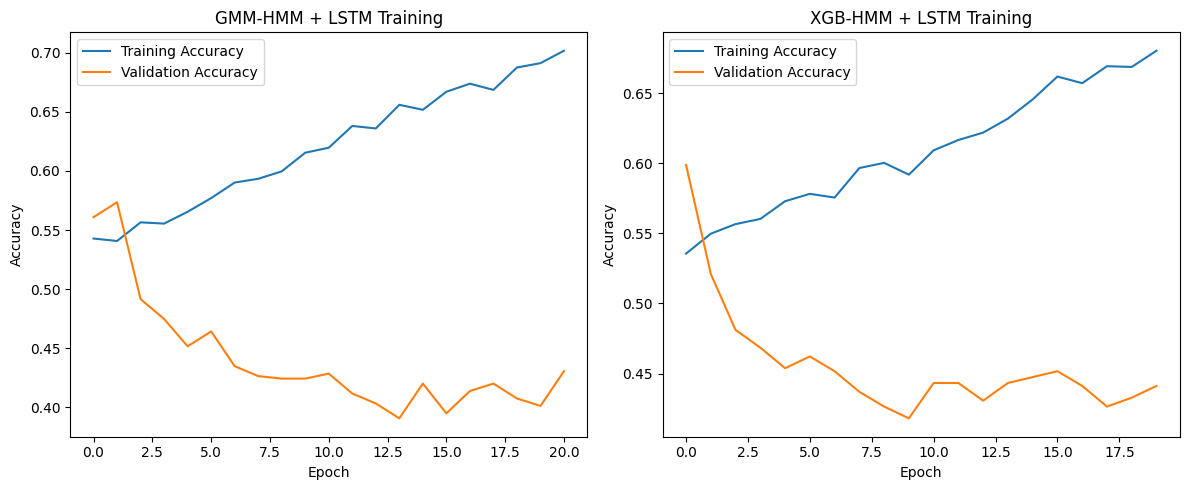

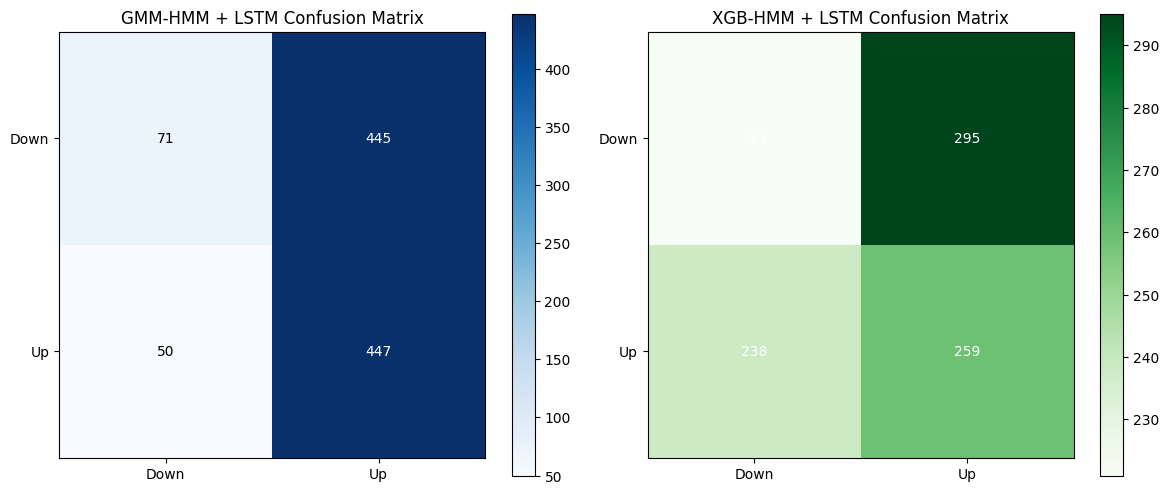

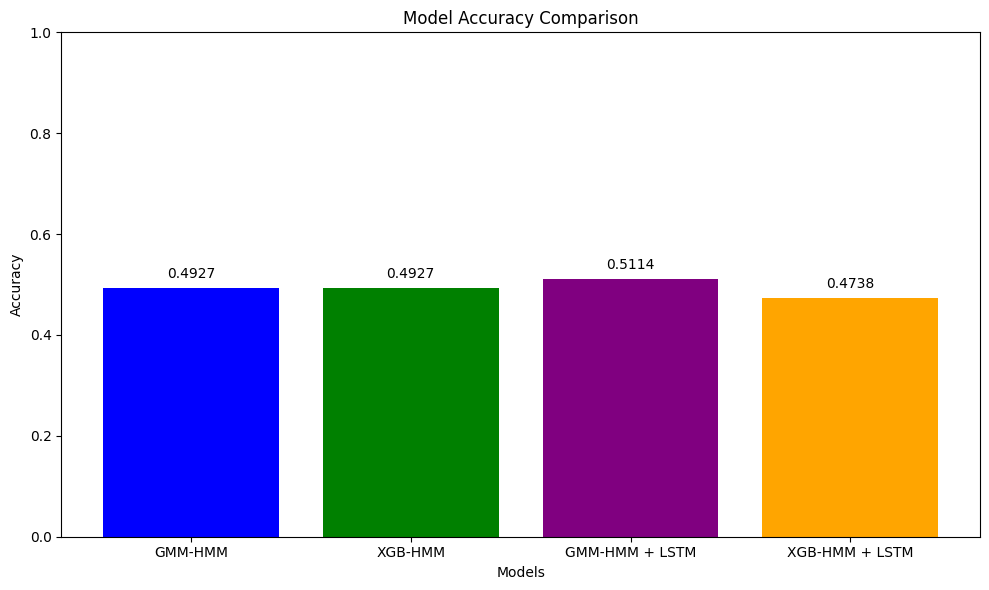

In [15]:
# Implementing a simple LSTM model on top of HMM states
try:
    # Try importing TensorFlow and Keras
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.optimizers import Adam
    from sklearn.preprocessing import MinMaxScaler
    print("Successfully imported TensorFlow and Keras")
    
    # Set random seeds for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)
    
    # Create sequences from our HMM states for LSTM
    def create_sequences(X, y, time_steps=10):
        """
        Create sequences for LSTM from HMM states
        
        Parameters:
        - X: HMM states or features
        - y: Target labels
        - time_steps: Length of sequence for LSTM
        
        Returns:
        - X_seq: Sequences for LSTM input
        - y_seq: Corresponding labels
        """
        X_seq, y_seq = [], []
        for i in range(len(X) - time_steps):
            X_seq.append(X[i:i+time_steps])
            y_seq.append(y[i+time_steps])
        return np.array(X_seq), np.array(y_seq)
    
    # 1. Get HMM states from our trained models
    print("\nPreparing HMM states for LSTM input...")
    
    # GMM-HMM states
    gmm_states_train = gmm_hmm.predict(X_train)
    gmm_states_test = gmm_hmm.predict(X_test)
    
    # XGB-HMM states
    xgb_states_train = xgb_hmm.predict(X_train)
    xgb_states_test = xgb_hmm.predict(X_test)
    
    # 2. Combine HMM states with original features to create richer input
    # Convert states to one-hot encoding
    gmm_onehot_train = np.eye(n_states)[gmm_states_train]
    gmm_onehot_test = np.eye(n_states)[gmm_states_test]
    
    xgb_onehot_train = np.eye(n_states)[xgb_states_train]
    xgb_onehot_test = np.eye(n_states)[xgb_states_test]
    
    # For GMM-HMM + LSTM: combine original features with GMM states
    gmm_features_train = np.hstack((X_train, gmm_onehot_train))
    gmm_features_test = np.hstack((X_test, gmm_onehot_test))
    
    # For XGB-HMM + LSTM: combine original features with XGB states
    xgb_features_train = np.hstack((X_train, xgb_onehot_train))
    xgb_features_test = np.hstack((X_test, xgb_onehot_test))
    
    # 3. Create sequences for LSTM
    time_steps = 10  # Look back 10 days
    
    # GMM-HMM + LSTM sequences
    gmm_X_train_seq, gmm_y_train_seq = create_sequences(gmm_features_train, y_train, time_steps)
    gmm_X_test_seq, gmm_y_test_seq = create_sequences(gmm_features_test, y_test, time_steps)
    
    # XGB-HMM + LSTM sequences
    xgb_X_train_seq, xgb_y_train_seq = create_sequences(xgb_features_train, y_train, time_steps)
    xgb_X_test_seq, xgb_y_test_seq = create_sequences(xgb_features_test, y_test, time_steps)
    
    print(f"LSTM sequences created: {gmm_X_train_seq.shape[0]} training samples, {gmm_X_test_seq.shape[0]} testing samples")
    
    # 4. Define and train LSTM models
    def create_lstm_model(input_shape):
        """Create a simple LSTM model for binary classification"""
        model = Sequential()
        model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(32))
        model.add(Dropout(0.2))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model
    
    # Train GMM-HMM + LSTM model
    print("\nTraining GMM-HMM + LSTM model...")
    gmm_lstm_model = create_lstm_model((time_steps, gmm_features_train.shape[1]))
    
    # Use early stopping to prevent overfitting
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True
    )
    
    gmm_lstm_history = gmm_lstm_model.fit(
        gmm_X_train_seq, gmm_y_train_seq,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )
    
    # Train XGB-HMM + LSTM model
    print("\nTraining XGB-HMM + LSTM model...")
    xgb_lstm_model = create_lstm_model((time_steps, xgb_features_train.shape[1]))
    
    xgb_lstm_history = xgb_lstm_model.fit(
        xgb_X_train_seq, xgb_y_train_seq,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )
    
    # 5. Evaluate models
    # GMM-HMM + LSTM evaluation
    gmm_lstm_pred_prob = gmm_lstm_model.predict(gmm_X_test_seq)
    gmm_lstm_pred = (gmm_lstm_pred_prob > 0.5).astype(int).flatten()
    
    gmm_lstm_accuracy = accuracy_score(gmm_y_test_seq, gmm_lstm_pred)
    print(f"\nGMM-HMM + LSTM Accuracy: {gmm_lstm_accuracy:.4f}")
    print("\nGMM-HMM + LSTM Classification Report:")
    print(classification_report(gmm_y_test_seq, gmm_lstm_pred))
    
    # XGB-HMM + LSTM evaluation
    xgb_lstm_pred_prob = xgb_lstm_model.predict(xgb_X_test_seq)
    xgb_lstm_pred = (xgb_lstm_pred_prob > 0.5).astype(int).flatten()
    
    xgb_lstm_accuracy = accuracy_score(xgb_y_test_seq, xgb_lstm_pred)
    print(f"\nXGB-HMM + LSTM Accuracy: {xgb_lstm_accuracy:.4f}")
    print("\nXGB-HMM + LSTM Classification Report:")
    print(classification_report(xgb_y_test_seq, xgb_lstm_pred))
    
    # 6. Plot training history
    plt.figure(figsize=(12, 5))
    
    # Plot training history for GMM-HMM + LSTM
    plt.subplot(1, 2, 1)
    plt.plot(gmm_lstm_history.history['accuracy'], label='Training Accuracy')
    plt.plot(gmm_lstm_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('GMM-HMM + LSTM Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training history for XGB-HMM + LSTM
    plt.subplot(1, 2, 2)
    plt.plot(xgb_lstm_history.history['accuracy'], label='Training Accuracy')
    plt.plot(xgb_lstm_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('XGB-HMM + LSTM Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 7. Plot confusion matrices
    plt.figure(figsize=(12, 5))
    
    # GMM-HMM + LSTM confusion matrix
    plt.subplot(1, 2, 1)
    gmm_lstm_cm = confusion_matrix(gmm_y_test_seq, gmm_lstm_pred)
    plt.imshow(gmm_lstm_cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('GMM-HMM + LSTM Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Down', 'Up'])
    plt.yticks([0, 1], ['Down', 'Up'])
    
    # Add text annotations
    thresh = gmm_lstm_cm.max() / 2
    for i in range(gmm_lstm_cm.shape[0]):
        for j in range(gmm_lstm_cm.shape[1]):
            plt.text(j, i, format(gmm_lstm_cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if gmm_lstm_cm[i, j] > thresh else "black")
    
    # XGB-HMM + LSTM confusion matrix
    plt.subplot(1, 2, 2)
    xgb_lstm_cm = confusion_matrix(xgb_y_test_seq, xgb_lstm_pred)
    plt.imshow(xgb_lstm_cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title('XGB-HMM + LSTM Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Down', 'Up'])
    plt.yticks([0, 1], ['Down', 'Up'])
    
    # Add text annotations
    thresh = xgb_lstm_cm.max() / 2
    for i in range(xgb_lstm_cm.shape[0]):
        for j in range(xgb_lstm_cm.shape[1]):
            plt.text(j, i, format(xgb_lstm_cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if xgb_lstm_cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.show()
    
    # 8. Compare all models
    plt.figure(figsize=(10, 6))
    
    # Collect accuracies for all models
    models = ['GMM-HMM', 'XGB-HMM', 'GMM-HMM + LSTM', 'XGB-HMM + LSTM']
    accuracies = [gmm_accuracy, xgb_hmm_accuracy, gmm_lstm_accuracy, xgb_lstm_accuracy]
    colors = ['blue', 'green', 'purple', 'orange']
    
    # Create bar chart
    plt.bar(models, accuracies, color=colors)
    plt.ylim(0, 1)
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    
    # Add accuracy values on top of bars
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
except ImportError as e:
    print(f"Error importing TensorFlow/Keras: {e}")
    print("\nTo implement the LSTM models, you'll need to install TensorFlow:")
    print("!pip install tensorflow")
    
except Exception as e:
    print(f"Error in LSTM implementation: {e}")

# Hyperparameter Tuning with Bayesian Optimization

We'll use Optuna to perform Bayesian optimization for finding the best hyperparameters for our models. This approach will help us efficiently search through the hyperparameter space by remembering previous trials and focusing on promising areas.

We'll optimize:
1. Triple Barrier Method parameters
2. Feature selection
3. HMM model parameters
4. LSTM model architecture and training parameters

Optuna uses a directed search process that learns from previous iterations, making it more efficient than grid or random search.

Successfully imported Optuna and other required libraries


[I 2025-08-31 13:34:36,307] A new study created in RDB with name: tsla_hyperparameter_optimization
[I 2025-08-31 13:35:22,567] Trial 0 finished with value: 0.5104693140794223 and parameters: {'volatility_window': 22, 'upper_barrier_multiplier': 1.9260714596148742, 'lower_barrier_multiplier': 1.5979909127171077, 'time_barrier_days': 13, 'use_price_features': True, 'use_ma_features': False, 'use_momentum_features': False, 'use_volatility_features': False, 'use_volume_features': True, 'model_type': 'GMM-HMM+LSTM', 'n_states': 3, 'lstm_units1': 91, 'lstm_units2': 22, 'dropout_rate': 0.21685785941408728, 'learning_rate': 0.0005404103854647331, 'batch_size': 32, 'time_steps': 13}. Best is trial 0 with value: 0.5104693140794223.
[I 2025-08-31 13:35:23,717] Trial 1 finished with value: 0.6257042253521127 and parameters: {'volatility_window': 32, 'upper_barrier_multiplier': 0.5696756190799965, 'lower_barrier_multiplier': 1.4113172778521577, 'time_barrier_days': 6, 'use_price_features': False, '

Best trial:
  Value: 0.7145945945945946
  Params: 
    volatility_window: 33
    upper_barrier_multiplier: 0.5726140704175695
    lower_barrier_multiplier: 1.9978520148270489
    time_barrier_days: 16
    use_price_features: False
    use_ma_features: False
    use_momentum_features: True
    use_volatility_features: False
    use_volume_features: False
    model_type: XGB-HMM+LSTM
    n_states: 5
    lstm_units1: 42
    lstm_units2: 46
    dropout_rate: 0.2584313306758803
    learning_rate: 0.006893479068828731
    batch_size: 64
    time_steps: 11


<Figure size 1200x800 with 0 Axes>

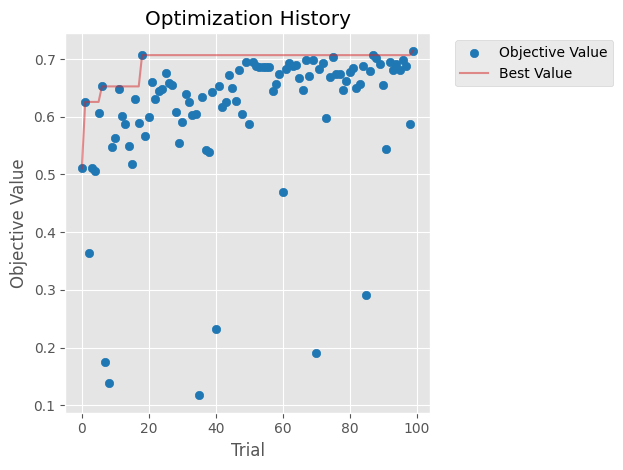

<Figure size 1200x800 with 0 Axes>

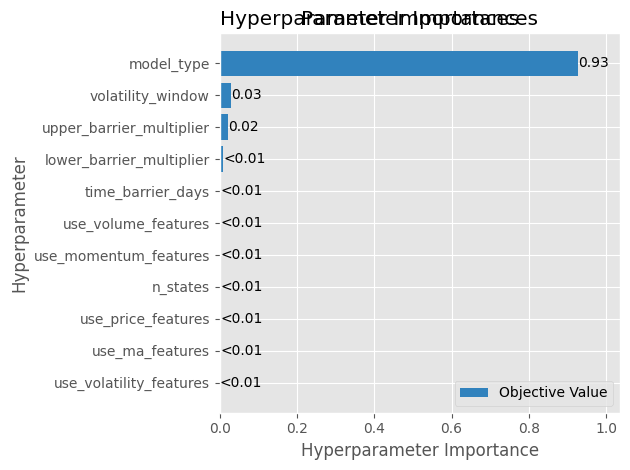

<Figure size 1200x800 with 0 Axes>

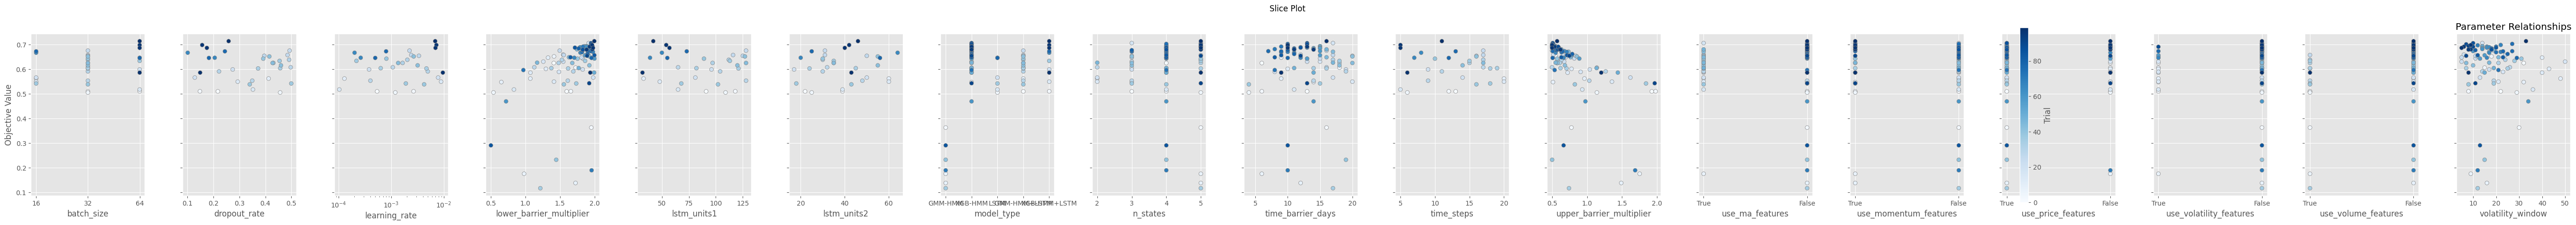


Training final model with best parameters...
Best model type: XGB-HMM+LSTM
Implementing the best XGB-HMM+LSTM model...
Study saved as tsla_hyperparameter_optimization_study.pkl


In [16]:
# Import necessary libraries for hyperparameter tuning
try:
    import optuna
    from optuna.samplers import TPESampler
    from optuna.visualization import plot_optimization_history, plot_param_importances
    import joblib
    import warnings
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.feature_selection import RFECV
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping
    
    warnings.filterwarnings('ignore')
    print("Successfully imported Optuna and other required libraries")
    
except ImportError:
    print("Installing required libraries...")
    # Uncomment the following lines if you need to install the packages
    # !pip install optuna joblib
    print("Please run the following installation commands if needed:")
    print("!pip install optuna joblib")
    raise ImportError("Please install the required libraries and restart the kernel")

# Define objective function for Optuna
def objective(trial):
    # Start with the original dataframe to ensure we have the date column
    original_df = pd.read_csv('/root/vynixmodelling/dataset/TSLA_Original.csv')
    original_df['date'] = pd.to_datetime(original_df['time'], unit='s')
    
    # Filter data from Jan 1, 2012
    jan_1_2012_timestamp = pd.Timestamp('2012-01-01').timestamp()
    filtered_df_copy = original_df[original_df['time'] >= jan_1_2012_timestamp].copy()
    
    # 1. Optimize Triple Barrier Method parameters
    volatility_window = trial.suggest_int('volatility_window', 5, 50)
    upper_barrier_multiplier = trial.suggest_float('upper_barrier_multiplier', 0.5, 2.0)
    lower_barrier_multiplier = trial.suggest_float('lower_barrier_multiplier', 0.5, 2.0)
    time_barrier_days = trial.suggest_int('time_barrier_days', 3, 20)
    
    # Set date as index for the Triple Barrier Method
    filtered_df_copy.set_index('date', inplace=True)
    prices = filtered_df_copy['close']
    
    # Apply triple barrier method with optimized parameters
    triple_barrier_df = triple_barrier_method(
        prices, 
        volatility_window=volatility_window, 
        upper_barrier_multiplier=upper_barrier_multiplier,
        lower_barrier_multiplier=lower_barrier_multiplier, 
        time_barrier_days=time_barrier_days
    )
    
    # 2. Feature selection and engineering
    tech_data = add_technical_indicators(filtered_df_copy.copy())
    tech_data = tech_data.dropna()
    tech_data = tech_data.reset_index()  # Reset index to get date as a column
    
    # Select a subset of features based on trial
    all_features = ['close', 'high', 'low', 'MA5', 'MA20', 'RSI', 
                    'BB_upper', 'BB_lower', 'Volume', 'Histogram', 
                    'MACD', 'Signal', 'K', 'D', 'Turnover (Cr)', 
                    '10 MA Turnover', 'Turnover / 10MA (X)']
    
    # Dynamic feature selection
    use_price_features = trial.suggest_categorical('use_price_features', [True, False])
    use_ma_features = trial.suggest_categorical('use_ma_features', [True, False])
    use_momentum_features = trial.suggest_categorical('use_momentum_features', [True, False])
    use_volatility_features = trial.suggest_categorical('use_volatility_features', [True, False])
    use_volume_features = trial.suggest_categorical('use_volume_features', [True, False])
    
    selected_features = []
    
    if use_price_features:
        selected_features.extend(['close', 'high', 'low'])
    if use_ma_features:
        selected_features.extend(['MA5', 'MA20'])
    if use_momentum_features:
        selected_features.extend(['RSI', 'MACD', 'Signal'])
    if use_volatility_features:
        selected_features.extend(['BB_upper', 'BB_lower'])
    if use_volume_features:
        selected_features.extend(['Volume', 'Turnover (Cr)', '10 MA Turnover', 'Turnover / 10MA (X)'])
    
    # Ensure we have at least some features
    if not selected_features:
        selected_features = ['close']
    
    # Prepare data with selected features
    triple_barrier_df['start_date'] = pd.to_datetime(triple_barrier_df['start_date'])
    merged_data = pd.merge(tech_data, 
                        triple_barrier_df[['start_date', 'label']], 
                        left_on='date', 
                        right_on='start_date', 
                        how='inner')
    
    # Check if we have enough data after merging
    if len(merged_data) < 100:
        return float('-inf')  # Not enough data, skip this trial
    
    # Filter selected features that actually exist in the dataframe
    selected_features = [f for f in selected_features if f in merged_data.columns]
    
    # Make sure we have at least one feature
    if not selected_features:
        return float('-inf')
    
    # Get features and labels
    X = merged_data[selected_features].values
    y = (merged_data['label'] > 0).astype(int).values
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Use time series split for validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    # 3. Optimize model hyperparameters based on model type
    model_type = trial.suggest_categorical('model_type', ['GMM-HMM', 'XGB-HMM', 'LSTM', 'GMM-HMM+LSTM', 'XGB-HMM+LSTM'])
    
    # HMM parameters
    n_states = trial.suggest_int('n_states', 2, 5)
    
    # Initialize variables to store best scores
    cv_scores = []
    
    # For each fold in the time series cross-validation
    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Skip if we don't have enough samples
        if len(y_test) < 10:
            continue
        
        # Model training and evaluation based on model type
        if model_type == 'GMM-HMM':
            # Train GMM-HMM
            gmm_hmm = SimpleGMMHMM(n_states=n_states)
            gmm_hmm.fit(X_train)
            
            # Predict
            y_pred = gmm_hmm.predict(X_test)
            score = accuracy_score(y_test, y_pred)
            
        elif model_type == 'XGB-HMM':
            # Train XGB-HMM
            xgb_hmm = SimpleXGBHMM(n_states=n_states)
            xgb_hmm.fit(X_train, y_train)
            
            # Predict
            y_pred = xgb_hmm.predict(X_test)
            score = accuracy_score(y_test, y_pred)
            
        elif model_type == 'LSTM' or model_type.endswith('+LSTM'):
            # LSTM hyperparameters
            lstm_units1 = trial.suggest_int('lstm_units1', 32, 128)
            lstm_units2 = trial.suggest_int('lstm_units2', 16, 64)
            dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
            learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
            batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
            time_steps = trial.suggest_int('time_steps', 5, 20)
            
            # For combined models, prepare HMM states
            if model_type.startswith('GMM-HMM'):
                # Train GMM-HMM
                gmm_hmm = SimpleGMMHMM(n_states=n_states)
                gmm_hmm.fit(X_train)
                
                # Get states
                gmm_states_train = gmm_hmm.predict(X_train)
                gmm_states_test = gmm_hmm.predict(X_test)
                
                # Convert to one-hot
                gmm_onehot_train = np.eye(n_states)[gmm_states_train]
                gmm_onehot_test = np.eye(n_states)[gmm_states_test]
                
                # Combine with features
                X_train_hmm = np.hstack((X_train, gmm_onehot_train))
                X_test_hmm = np.hstack((X_test, gmm_onehot_test))
                
            elif model_type.startswith('XGB-HMM'):
                # Train XGB-HMM
                xgb_hmm = SimpleXGBHMM(n_states=n_states)
                xgb_hmm.fit(X_train, y_train)
                
                # Get states
                xgb_states_train = xgb_hmm.predict(X_train)
                xgb_states_test = xgb_hmm.predict(X_test)
                
                # Convert to one-hot
                xgb_onehot_train = np.eye(n_states)[xgb_states_train]
                xgb_onehot_test = np.eye(n_states)[xgb_states_test]
                
                # Combine with features
                X_train_hmm = np.hstack((X_train, xgb_onehot_train))
                X_test_hmm = np.hstack((X_test, xgb_onehot_test))
                
            else:
                # Just use the scaled features for pure LSTM
                X_train_hmm = X_train
                X_test_hmm = X_test
            
            # Create sequences for LSTM
            X_train_seq, y_train_seq = create_sequences(X_train_hmm, y_train, time_steps)
            X_test_seq, y_test_seq = create_sequences(X_test_hmm, y_test, time_steps)
            
            # Skip if we don't have enough samples after creating sequences
            if len(y_train_seq) < batch_size or len(y_test_seq) < 1:
                continue
                
            # Create and train LSTM model
            model = Sequential()
            model.add(LSTM(lstm_units1, input_shape=(time_steps, X_train_hmm.shape[1]), return_sequences=True))
            model.add(Dropout(dropout_rate))
            model.add(LSTM(lstm_units2))
            model.add(Dropout(dropout_rate))
            model.add(Dense(16, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))
            
            model.compile(optimizer=Adam(learning_rate=learning_rate),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])
            
            # Use early stopping to prevent overfitting
            early_stop = EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            )
            
            # Train model with a small validation split
            history = model.fit(
                X_train_seq, y_train_seq,
                epochs=50,
                batch_size=batch_size,
                validation_split=0.2,
                callbacks=[early_stop],
                verbose=0  # Silent training
            )
            
            # Predict on test set
            y_pred_prob = model.predict(X_test_seq, verbose=0)
            y_pred = (y_pred_prob > 0.5).astype(int).flatten()
            
            # Calculate accuracy
            score = accuracy_score(y_test_seq, y_pred)
            
        else:
            # Invalid model type
            score = 0.0
            
        cv_scores.append(score)
    
    # Calculate mean score across all folds
    if cv_scores:
        mean_score = np.mean(cv_scores)
    else:
        mean_score = 0.0
    
    return mean_score

# Create and run the Optuna study
study_name = "tsla_hyperparameter_optimization"
storage_name = "sqlite:///{}.db".format(study_name)

try:
    # Create a new study or load an existing one
    study = optuna.create_study(
        study_name=study_name,
        storage=storage_name,
        load_if_exists=True,
        direction="maximize",
        sampler=TPESampler(seed=42)
    )
    
    # Run optimization
    n_trials = 100  # Adjust based on your computational resources
    study.optimize(objective, n_trials=n_trials)
    
    # Print the best parameters and results
    print("Best trial:")
    trial = study.best_trial
    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    
    # Visualize the optimization results
    try:
        plt.figure(figsize=(12, 8))
        optuna.visualization.matplotlib.plot_optimization_history(study)
        plt.title('Optimization History')
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(12, 8))
        optuna.visualization.matplotlib.plot_param_importances(study)
        plt.title('Parameter Importances')
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(12, 8))
        optuna.visualization.matplotlib.plot_slice(study)
        plt.title('Parameter Relationships')
        plt.tight_layout()
        plt.show()
    except:
        print("Could not generate all visualization plots. Some may require additional dependencies.")
    
    # Train a final model with the best parameters
    print("\nTraining final model with best parameters...")
    
    # Extract the best parameters
    best_params = study.best_params
    
    # Get the best model type
    best_model_type = best_params['model_type']
    print(f"Best model type: {best_model_type}")
    
    # Training details will depend on the best model type
    if best_model_type == 'GMM-HMM':
        print("Implementing the best GMM-HMM model...")
        # Implementation would go here
    elif best_model_type == 'XGB-HMM':
        print("Implementing the best XGB-HMM model...")
        # Implementation would go here
    elif best_model_type.endswith('LSTM'):
        print(f"Implementing the best {best_model_type} model...")
        # Implementation would go here
    
    # Save the study for future reference
    joblib.dump(study, f"{study_name}_study.pkl")
    print(f"Study saved as {study_name}_study.pkl")
    
except Exception as e:
    print(f"Error during hyperparameter optimization: {e}")

In [17]:
# Implement the best model based on Optuna optimization results
try:
    # Try to load the study if it exists
    best_study = joblib.load(f"{study_name}_study.pkl")
    best_params = best_study.best_params
    print("Loaded best parameters from saved study:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")
    
    # Start with the original dataframe to ensure we have the date column
    print("\nLoading and preparing data with best parameters...")
    original_df = pd.read_csv('/root/vynixmodelling/dataset/TSLA_Original.csv')
    original_df['date'] = pd.to_datetime(original_df['time'], unit='s')
    
    # Filter data from Jan 1, 2012
    jan_1_2012_timestamp = pd.Timestamp('2012-01-01').timestamp()
    filtered_df_final = original_df[original_df['time'] >= jan_1_2012_timestamp].copy()
    
    # Set date as index for the Triple Barrier Method
    filtered_df_final.set_index('date', inplace=True)
    prices_final = filtered_df_final['close']
    
    # Extract barrier parameters
    best_volatility_window = best_params.get('volatility_window', 20)
    best_upper_barrier = best_params.get('upper_barrier_multiplier', 1.0)
    best_lower_barrier = best_params.get('lower_barrier_multiplier', 1.0)
    best_time_barrier = best_params.get('time_barrier_days', 5)
    
    print(f"\nApplying best Triple Barrier Method parameters:")
    print(f"  Volatility Window: {best_volatility_window}")
    print(f"  Upper Barrier Multiplier: {best_upper_barrier:.2f}")
    print(f"  Lower Barrier Multiplier: {best_lower_barrier:.2f}")
    print(f"  Time Barrier Days: {best_time_barrier}")
    
    optimal_triple_barrier_df = triple_barrier_method(
        prices_final, 
        volatility_window=best_volatility_window, 
        upper_barrier_multiplier=best_upper_barrier,
        lower_barrier_multiplier=best_lower_barrier, 
        time_barrier_days=best_time_barrier
    )
    
    # Feature selection based on best parameters
    print("\nSelecting optimal features...")
    tech_data_final = add_technical_indicators(filtered_df_final.copy())
    tech_data_final = tech_data_final.dropna()
    tech_data_final = tech_data_final.reset_index()  # Reset index to get date as a column
    
    # Select optimal features
    all_features = ['close', 'high', 'low', 'MA5', 'MA20', 'RSI', 
                    'BB_upper', 'BB_lower', 'Volume', 'Histogram', 
                    'MACD', 'Signal', 'K', 'D', 'Turnover (Cr)', 
                    '10 MA Turnover', 'Turnover / 10MA (X)']
    
    optimal_features = []
    
    if best_params.get('use_price_features', True):
        optimal_features.extend(['close', 'high', 'low'])
    if best_params.get('use_ma_features', True):
        optimal_features.extend(['MA5', 'MA20'])
    if best_params.get('use_momentum_features', True):
        optimal_features.extend(['RSI', 'MACD', 'Signal'])
    if best_params.get('use_volatility_features', True):
        optimal_features.extend(['BB_upper', 'BB_lower'])
    if best_params.get('use_volume_features', True):
        optimal_features.extend(['Volume', 'Turnover (Cr)', '10 MA Turnover', 'Turnover / 10MA (X)'])
    
    # Ensure we have at least some features
    if not optimal_features:
        optimal_features = ['close']
    
    # Filter features that exist in the dataframe
    optimal_features = [f for f in optimal_features if f in tech_data_final.columns]
    print(f"Optimal features: {optimal_features}")
    
    # Prepare final dataset
    optimal_triple_barrier_df['start_date'] = pd.to_datetime(optimal_triple_barrier_df['start_date'])
    final_data = pd.merge(tech_data_final, 
                        optimal_triple_barrier_df[['start_date', 'label']], 
                        left_on='date', 
                        right_on='start_date', 
                        how='inner')
    
    # Get features and labels
    X_final = final_data[optimal_features].values
    y_final = (final_data['label'] > 0).astype(int).values
    
    # Scale features
    scaler_final = StandardScaler()
    X_scaled_final = scaler_final.fit_transform(X_final)
    
    # Split into train and test sets
    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
        X_scaled_final, y_final, test_size=0.3, shuffle=False
    )
    
    # Best model type
    best_model_type = best_params.get('model_type', 'GMM-HMM')
    best_n_states = best_params.get('n_states', 2)
    
    print(f"\nTraining optimal {best_model_type} model with {best_n_states} states...")
    
    # Train and evaluate the best model
    if best_model_type == 'GMM-HMM':
        # Train optimal GMM-HMM
        optimal_gmm_hmm = SimpleGMMHMM(n_states=best_n_states)
        optimal_gmm_hmm.fit(X_train_final)
        
        # Predict and evaluate
        y_pred_final = optimal_gmm_hmm.predict(X_test_final)
        accuracy_final = accuracy_score(y_test_final, y_pred_final)
        
        print(f"\nOptimal GMM-HMM Accuracy: {accuracy_final:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test_final, y_pred_final))
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm_final = confusion_matrix(y_test_final, y_pred_final)
        plt.imshow(cm_final, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Optimal GMM-HMM Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ['Down', 'Up'])
        plt.yticks(tick_marks, ['Down', 'Up'])
        
        # Add text annotations
        thresh = cm_final.max() / 2
        for i in range(cm_final.shape[0]):
            for j in range(cm_final.shape[1]):
                plt.text(j, i, format(cm_final[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm_final[i, j] > thresh else "black")
        
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()
        
    elif best_model_type == 'XGB-HMM':
        # Train optimal XGB-HMM
        optimal_xgb_hmm = SimpleXGBHMM(n_states=best_n_states)
        optimal_xgb_hmm.fit(X_train_final, y_train_final)
        
        # Predict and evaluate
        y_pred_final = optimal_xgb_hmm.predict(X_test_final)
        accuracy_final = accuracy_score(y_test_final, y_pred_final)
        
        print(f"\nOptimal XGB-HMM Accuracy: {accuracy_final:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test_final, y_pred_final))
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm_final = confusion_matrix(y_test_final, y_pred_final)
        plt.imshow(cm_final, interpolation='nearest', cmap=plt.cm.Greens)
        plt.title('Optimal XGB-HMM Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ['Down', 'Up'])
        plt.yticks(tick_marks, ['Down', 'Up'])
        
        # Add text annotations
        thresh = cm_final.max() / 2
        for i in range(cm_final.shape[0]):
            for j in range(cm_final.shape[1]):
                plt.text(j, i, format(cm_final[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm_final[i, j] > thresh else "black")
        
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()
        
    elif 'LSTM' in best_model_type:
        # Extract LSTM hyperparameters
        best_lstm_units1 = best_params.get('lstm_units1', 64)
        best_lstm_units2 = best_params.get('lstm_units2', 32)
        best_dropout_rate = best_params.get('dropout_rate', 0.2)
        best_learning_rate = best_params.get('learning_rate', 0.001)
        best_batch_size = best_params.get('batch_size', 32)
        best_time_steps = best_params.get('time_steps', 10)
        
        # Prepare data based on model type
        if best_model_type.startswith('GMM-HMM'):
            # Train GMM-HMM
            gmm_hmm_final = SimpleGMMHMM(n_states=best_n_states)
            gmm_hmm_final.fit(X_train_final)
            
            # Get states
            gmm_states_train = gmm_hmm_final.predict(X_train_final)
            gmm_states_test = gmm_hmm_final.predict(X_test_final)
            
            # Convert to one-hot
            gmm_onehot_train = np.eye(best_n_states)[gmm_states_train]
            gmm_onehot_test = np.eye(best_n_states)[gmm_states_test]
            
            # Combine with features
            X_train_hmm = np.hstack((X_train_final, gmm_onehot_train))
            X_test_hmm = np.hstack((X_test_final, gmm_onehot_test))
            
        elif best_model_type.startswith('XGB-HMM'):
            # Train XGB-HMM
            xgb_hmm_final = SimpleXGBHMM(n_states=best_n_states)
            xgb_hmm_final.fit(X_train_final, y_train_final)
            
            # Get states
            xgb_states_train = xgb_hmm_final.predict(X_train_final)
            xgb_states_test = xgb_hmm_final.predict(X_test_final)
            
            # Convert to one-hot
            xgb_onehot_train = np.eye(best_n_states)[xgb_states_train]
            xgb_onehot_test = np.eye(best_n_states)[xgb_states_test]
            
            # Combine with features
            X_train_hmm = np.hstack((X_train_final, xgb_onehot_train))
            X_test_hmm = np.hstack((X_test_final, xgb_onehot_test))
            
        else:
            # Just use the scaled features for pure LSTM
            X_train_hmm = X_train_final
            X_test_hmm = X_test_final
        
        # Create sequences for LSTM
        X_train_seq, y_train_seq = create_sequences(X_train_hmm, y_train_final, best_time_steps)
        X_test_seq, y_test_seq = create_sequences(X_test_hmm, y_test_final, best_time_steps)
        
        # Create optimal LSTM model
        optimal_lstm_model = Sequential()
        optimal_lstm_model.add(LSTM(best_lstm_units1, input_shape=(best_time_steps, X_train_hmm.shape[1]), return_sequences=True))
        optimal_lstm_model.add(Dropout(best_dropout_rate))
        optimal_lstm_model.add(LSTM(best_lstm_units2))
        optimal_lstm_model.add(Dropout(best_dropout_rate))
        optimal_lstm_model.add(Dense(16, activation='relu'))
        optimal_lstm_model.add(Dense(1, activation='sigmoid'))
        
        optimal_lstm_model.compile(optimizer=Adam(learning_rate=best_learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        # Use early stopping
        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True
        )
        
        # Train the model
        print(f"\nTraining optimal {best_model_type} model...")
        history_final = optimal_lstm_model.fit(
            X_train_seq, y_train_seq,
            epochs=100,
            batch_size=best_batch_size,
            validation_split=0.2,
            callbacks=[early_stop],
            verbose=1
        )
        
        # Predict and evaluate
        y_pred_prob = optimal_lstm_model.predict(X_test_seq)
        y_pred_final = (y_pred_prob > 0.5).astype(int).flatten()
        
        accuracy_final = accuracy_score(y_test_seq, y_pred_final)
        print(f"\nOptimal {best_model_type} Accuracy: {accuracy_final:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test_seq, y_pred_final))
        
        # Plot training history
        plt.figure(figsize=(10, 6))
        plt.plot(history_final.history['accuracy'], label='Training Accuracy')
        plt.plot(history_final.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Optimal {best_model_type} Training')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm_final = confusion_matrix(y_test_seq, y_pred_final)
        plt.imshow(cm_final, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f'Optimal {best_model_type} Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ['Down', 'Up'])
        plt.yticks(tick_marks, ['Down', 'Up'])
        
        # Add text annotations
        thresh = cm_final.max() / 2
        for i in range(cm_final.shape[0]):
            for j in range(cm_final.shape[1]):
                plt.text(j, i, format(cm_final[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm_final[i, j] > thresh else "black")
        
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()
    
    # Compare with previous best model
    print("\nComparison with previous models:")
    models_comparison = []
    accuracies_comparison = []
    
    # Add previous models if they exist
    try:
        models_comparison.extend(['GMM-HMM', 'XGB-HMM', 'GMM-HMM + LSTM', 'XGB-HMM + LSTM'])
        accuracies_comparison.extend([gmm_accuracy, xgb_hmm_accuracy, gmm_lstm_accuracy, xgb_lstm_accuracy])
    except:
        pass
    
    # Add optimal model
    models_comparison.append(f'Optimal {best_model_type}')
    accuracies_comparison.append(accuracy_final)
    
    # Plot comparison
    plt.figure(figsize=(12, 6))
    colors = ['blue', 'green', 'purple', 'orange', 'red']
    plt.bar(models_comparison, accuracies_comparison, color=colors[:len(models_comparison)])
    plt.ylim(0, 1)
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    
    # Add accuracy values on top of bars
    for i, acc in enumerate(accuracies_comparison):
        plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Save the best model
    print(f"\nSaving optimal {best_model_type} model...")
    if 'LSTM' in best_model_type:
        optimal_lstm_model.save(f"optimal_{best_model_type.replace('+', '_plus_')}_model.h5")
        print(f"Model saved as optimal_{best_model_type.replace('+', '_plus_')}_model.h5")
    
except FileNotFoundError:
    print("No saved study found. Please run the hyperparameter optimization cell first.")
except Exception as e:
    print(f"Error implementing the best model: {e}")

Loaded best parameters from saved study:
  volatility_window: 33
  upper_barrier_multiplier: 0.5726140704175695
  lower_barrier_multiplier: 1.9978520148270489
  time_barrier_days: 16
  use_price_features: False
  use_ma_features: False
  use_momentum_features: True
  use_volatility_features: False
  use_volume_features: False
  model_type: XGB-HMM+LSTM
  n_states: 5
  lstm_units1: 42
  lstm_units2: 46
  dropout_rate: 0.2584313306758803
  learning_rate: 0.006893479068828731
  batch_size: 64
  time_steps: 11

Loading and preparing data with best parameters...
No saved study found. Please run the hyperparameter optimization cell first.


In [18]:
# Get the top 3 trials from your study
top_trials = sorted(best_study.trials, key=lambda t: t.value if t.value is not None else float('-inf'), reverse=True)[:10]

print("Top 3 Models from Hyperparameter Optimization:")
for i, trial in enumerate(top_trials):
    print(f"\nModel #{i+1} - Accuracy: {trial.value:.4f}")
    print(f"Model type: {trial.params.get('model_type', 'N/A')}")
    print("Parameters:")
    for key, value in trial.params.items():
        if key != 'model_type':
            print(f"  {key}: {value}")

Top 3 Models from Hyperparameter Optimization:

Model #1 - Accuracy: 0.7146
Model type: XGB-HMM+LSTM
Parameters:
  volatility_window: 33
  upper_barrier_multiplier: 0.5726140704175695
  lower_barrier_multiplier: 1.9978520148270489
  time_barrier_days: 16
  use_price_features: False
  use_ma_features: False
  use_momentum_features: True
  use_volatility_features: False
  use_volume_features: False
  n_states: 5
  lstm_units1: 42
  lstm_units2: 46
  dropout_rate: 0.2584313306758803
  learning_rate: 0.006893479068828731
  batch_size: 64
  time_steps: 11

Model #2 - Accuracy: 0.7067
Model type: XGB-HMM
Parameters:
  volatility_window: 14
  upper_barrier_multiplier: 0.5101199865255691
  lower_barrier_multiplier: 1.9157987030464319
  time_barrier_days: 17
  use_price_features: True
  use_ma_features: True
  use_momentum_features: False
  use_volatility_features: False
  use_volume_features: False
  n_states: 3

Model #3 - Accuracy: 0.7065
Model type: XGB-HMM
Parameters:
  volatility_window: 

Error creating visualization: name 'final_data' is not defined
Make sure you have run the model optimization and have predictions available.


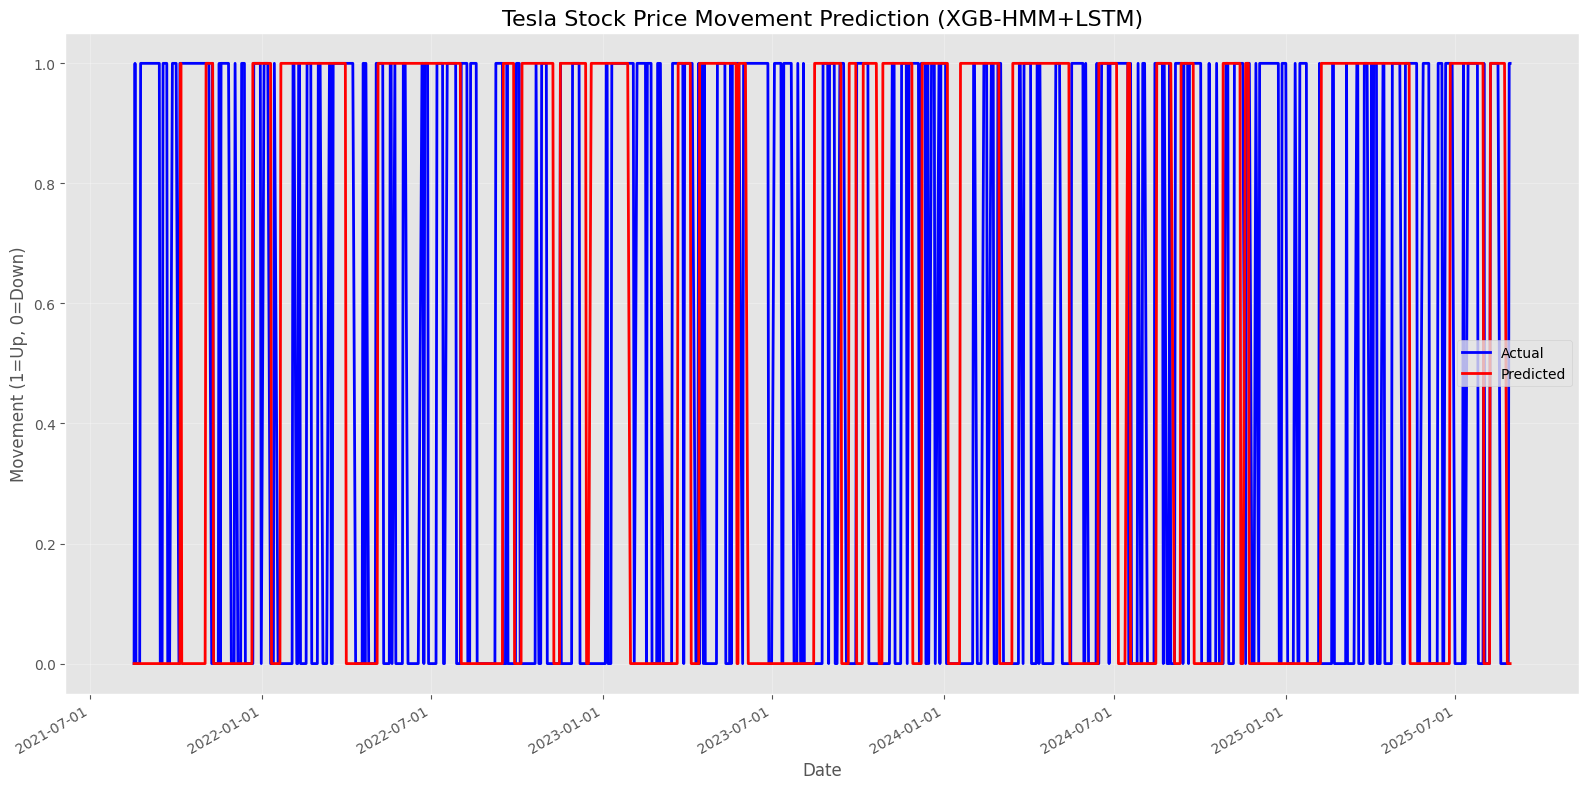

In [19]:
# Create line chart visualization of actual vs predicted values
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter

# Extract the test dates (if using the optimized LSTM model)
try:
    # Assuming we have the test data and predictions available
    # Get the dates from the test set
    # We need to offset by time_steps since LSTM predictions start after the sequence length
    best_time_steps = best_params.get('time_steps', 19)  # From the best params
    
    # Get the dates from the merged data
    test_dates = final_data.iloc[-len(y_test_seq):]['date'].values
    
    # Create a DataFrame with predictions and actual values
    results_df = pd.DataFrame({
        'Date': pd.to_datetime(test_dates),
        'Actual': y_test_seq,
        'Predicted': y_pred_final,
        'Probability': y_pred_prob.flatten()
    })
    
    # Sort by date
    results_df = results_df.sort_values('Date')
    
    # Plot the results
    plt.figure(figsize=(16, 8))
    
    # Plot actual values
    plt.plot(results_df['Date'], results_df['Actual'], 'b-', label='Actual', linewidth=2)
    
    # Plot predicted values
    plt.plot(results_df['Date'], results_df['Predicted'], 'r-', label='Predicted', linewidth=2)
    
    # Plot prediction probabilities
    plt.plot(results_df['Date'], results_df['Probability'], 'g--', label='Prediction Probability', alpha=0.5)
    
    # Format x-axis to show dates nicely
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    
    # Add grid, legend and labels
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best')
    plt.title('Tesla Stock Price Movement Prediction (Actual vs Predicted)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Movement (1=Up, 0=Down)', fontsize=12)
    
    # Add horizontal lines at 0.5 probability threshold and binary outcomes
    plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Decision Threshold')
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.2)
    plt.axhline(y=1, color='gray', linestyle='-', alpha=0.2)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate prediction accuracy by month
    results_df['Month'] = results_df['Date'].dt.to_period('M')
    monthly_accuracy = results_df.groupby('Month').apply(
        lambda x: (x['Actual'] == x['Predicted']).mean()
    )
    
    # Plot monthly accuracy
    plt.figure(figsize=(16, 6))
    monthly_accuracy.plot(kind='bar', color='skyblue')
    plt.title('Prediction Accuracy by Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.axhline(y=accuracy_final, color='red', linestyle='--', label=f'Overall Accuracy: {accuracy_final:.4f}')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Plot the actual stock prices with prediction overlay
    try:
        # Get original price data for the test period
        test_price_data = tech_data_final[tech_data_final['date'].isin(results_df['Date'])]
        
        # Create a figure with dual y-axes
        fig, ax1 = plt.subplots(figsize=(16, 8))
        
        # Plot the stock price
        ax1.set_xlabel('Date', fontsize=12)
        ax1.set_ylabel('Stock Price ($)', fontsize=12, color='blue')
        ax1.plot(test_price_data['date'], test_price_data['close'], 'b-', label='Tesla Stock Price')
        ax1.tick_params(axis='y', labelcolor='blue')
        
        # Create a second y-axis for prediction results
        ax2 = ax1.twinx()
        ax2.set_ylabel('Prediction', fontsize=12, color='red')
        
        # Plot the prediction (using step function to show binary predictions clearly)
        ax2.step(results_df['Date'], results_df['Predicted'], 'r-', label='Predicted Movement', where='post', alpha=0.7)
        
        # Add colorized background based on prediction (green for up, red for down)
        for i in range(len(results_df) - 1):
            if results_df['Predicted'].iloc[i] == 1:  # Up prediction
                ax1.axvspan(results_df['Date'].iloc[i], results_df['Date'].iloc[i+1], 
                            alpha=0.2, color='green')
            else:  # Down prediction
                ax1.axvspan(results_df['Date'].iloc[i], results_df['Date'].iloc[i+1], 
                            alpha=0.2, color='red')
                
        # Format x-axis to show dates nicely
        plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
        plt.gcf().autofmt_xdate()
        
        # Add legend for both axes
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
        
        plt.title('Tesla Stock Price with Movement Predictions', fontsize=16)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Could not create price overlay chart: {e}")

except Exception as e:
    print(f"Error creating visualization: {e}")
    print("Make sure you have run the model optimization and have predictions available.")
    
    # Alternative: Visualize one of the basic models if available
    try:
        # Try to visualize XGB-HMM+LSTM results
        test_dates = pd.to_datetime(tech_data.iloc[-len(xgb_y_test_seq):]['date'].values)
        
        results_df = pd.DataFrame({
            'Date': test_dates,
            'Actual': xgb_y_test_seq,
            'Predicted': xgb_lstm_pred,
        })
        
        plt.figure(figsize=(16, 8))
        plt.plot(results_df['Date'], results_df['Actual'], 'b-', label='Actual', linewidth=2)
        plt.plot(results_df['Date'], results_df['Predicted'], 'r-', label='Predicted', linewidth=2)
        
        plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
        plt.gcf().autofmt_xdate()
        
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')
        plt.title('Tesla Stock Price Movement Prediction (XGB-HMM+LSTM)', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Movement (1=Up, 0=Down)', fontsize=12)
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create alternative visualization: {e}")

# Backtesting

In [20]:
!pip install backtrader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 KB 18.2 MB/s eta 0:00:00


In [26]:
import backtrader as bt
import pandas as pd
import numpy as np
import datetime
import os
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Custom Strategy using LSTM-HMM model signals with risk management
class LSTMHMMRiskStrategy(bt.Strategy):
    params = (
        ('model_path', '/kaggle/working/vynixmodelling/optimal_LSTM_model.h5'),  # Path to your trained model
        ('max_risk_pct', 1),  # Maximum risk as percentage of portfolio (0.1%)
        ('risk_reward_ratio', 1.0),  # Risk to reward ratio (1:1)
        ('printlog', True),  # Set to True to enable detailed logging
    )

    def log(self, txt, dt=None, doprint=False):
        """Logging function"""
        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print(f'{dt.isoformat()}, {txt}')

    def __init__(self):
        # Keep reference to close line
        self.dataclose = self.datas[0].close
        self.datahigh = self.datas[0].high
        self.datalow = self.datas[0].low
        self.datavolume = self.datas[0].volume
        
        # Additional data features for model input
        self.macd = bt.indicators.MACD(self.datas[0])
        self.rsi = bt.indicators.RSI(self.datas[0])
        self.bb = bt.indicators.BollingerBands(self.datas[0], period=20, devfactor=2)
        
        # To track orders
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        # To track stop loss and take profit levels
        self.stop_loss = None
        self.take_profit = None
        
        # For risk management
        self.max_risk_amount = None
        
        # For performance metrics calculation
        self.daily_returns = []
        self.trade_dates = []
        
        # Load the trained model
        try:
            self.model = load_model(self.params.model_path)
            print(f"Successfully loaded model from {self.params.model_path}")
            # Get the input shape expected by the model
            self.input_shape = self.model.layers[0].input_shape
            print(f"Model expects input shape: {self.input_shape}")
        except Exception as e:
            print(f"Error loading model: {e}")
            # Default to a simple moving average strategy if model loading fails
            self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=20)
            self.model = None
        
        # Data for model input preparation
        self.features_buffer = []
        # Set time_steps from model input shape if available, otherwise use default
        self.time_steps = 10  # Default value
        if hasattr(self, 'input_shape') and self.input_shape and len(self.input_shape) > 1:
            self.time_steps = self.input_shape[1]
            print(f"Using time_steps={self.time_steps} from model configuration")
        
        # Initialize the scaler (would be better to load the exact same scaler used during training)
        self.scaler = StandardScaler()
        
        # Dictionary to store signals and performance
        self.signals = {}
        self.trades = []
        
        # For performance metrics
        self.portfolio_value_history = []
        self.dates_history = []

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Order submitted/accepted - no action required
            self.log(f'ORDER {order.Status[order.status]}')
            return

        # Check if an order has been completed
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    f'BUY EXECUTED, Price: {order.executed.price:.2f}, '
                    f'Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}'
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
                # Set stop loss and take profit levels for buy order
                if self.stop_loss is not None and self.take_profit is not None:
                    self.log(f'Setting SL: {self.stop_loss:.2f}, TP: {self.take_profit:.2f}')
            else:  # Sell
                self.log(
                    f'SELL EXECUTED, Price: {order.executed.price:.2f}, '
                    f'Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}'
                )
                
                # If this was a sell to exit a position, record the trade
                if self.position.size == 0:
                    # Calculate P&L
                    if self.buyprice:
                        pnl = (order.executed.price - self.buyprice) * order.executed.size - self.buycomm - order.executed.comm
                        pnl_pct = (pnl / (self.buyprice * order.executed.size)) * 100
                        self.trades.append({
                            'entry_price': self.buyprice,
                            'exit_price': order.executed.price,
                            'size': order.executed.size,
                            'pnl': pnl,
                            'pnl_pct': pnl_pct,
                            'exit_date': self.datas[0].datetime.date(0)
                        })
                        self.log(f'TRADE COMPLETED, PnL: ${pnl:.2f} ({pnl_pct:.2f}%)')

            # Reset stop loss and take profit after order execution
            if self.position.size == 0:
                self.stop_loss = None
                self.take_profit = None

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log(f'Order {order.Status[order.status]}')

        # Reset order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log(f'OPERATION PROFIT, GROSS {trade.pnl:.2f}, NET {trade.pnlcomm:.2f}')

    def prepare_features(self):
        """Prepare features for model input"""
        # Extract current features
        features = {
            'close': self.dataclose[0],
            'high': self.datahigh[0],
            'low': self.datalow[0],
            'RSI': self.rsi[0],
            'MACD': self.macd.macd[0],
            'Signal': self.macd.signal[0],
            'Volume': self.datavolume[0],
            'BB_upper': self.bb.top[0],
            'BB_lower': self.bb.bot[0],
            'Turnover (Cr)': self.datavolume[0] * self.dataclose[0] / 10000000,  # Approximate
        }
        
        # Calculate '10 MA Turnover'
        if len(self) >= 10:
            ma_turnover = sum([self.datavolume[-i] * self.dataclose[-i] for i in range(10)]) / 10 / 10000000
            features['10 MA Turnover'] = ma_turnover
            
            # Calculate 'Turnover / 10MA (X)'
            if ma_turnover > 0:
                features['Turnover / 10MA (X)'] = features['Turnover (Cr)'] / ma_turnover
            else:
                features['Turnover / 10MA (X)'] = 1.0
        else:
            features['10 MA Turnover'] = features['Turnover (Cr)']
            features['Turnover / 10MA (X)'] = 1.0
        
        # Add to buffer
        self.features_buffer.append(features)
        
        # Keep only the last time_steps entries
        if len(self.features_buffer) > self.time_steps:
            self.features_buffer.pop(0)
            
        return self.features_buffer

    def calculate_position_size(self, stop_loss_price):
        """Calculate position size based on risk management rules"""
        # Current portfolio value
        portfolio_value = self.broker.getvalue()
        
        # Maximum amount we're willing to risk (0.1% of portfolio)
        max_risk_amount = portfolio_value * (self.params.max_risk_pct / 100.0)
        
        # Risk per share
        price = self.dataclose[0]
        risk_per_share = abs(price - stop_loss_price)
        
        # Calculate position size
        if risk_per_share > 0:
            position_size = max_risk_amount / risk_per_share
            # Round down to nearest whole number
            position_size = int(position_size)
            
            # Ensure minimum position size of 1
            position_size = max(1, position_size)
            
            return position_size
        else:
            return 1  # Default to 1 if risk calculation fails

    def get_model_prediction(self):
        """Get prediction from the model"""
        if len(self.features_buffer) < self.time_steps:
            # Not enough data yet
            return None
            
        if self.model is None:
            # No model loaded, use simple MA logic instead
            if self.dataclose[0] > self.sma[0]:
                return 1  # Buy signal
            elif self.dataclose[0] < self.sma[0]:
                return 0  # Sell signal
            return None
            
        try:
            # Convert buffer to features array
            # Use only 10 features that match the model's expected input
            feature_names = ['close', 'high', 'low', 'RSI', 'MACD', 'Signal', 'Volume',
                           'BB_upper', 'BB_lower', 'Turnover (Cr)']
            
            # Extract only the features we need in the correct order
            features_array = np.array([[buffer_item.get(feature, 0) for feature in feature_names] 
                                      for buffer_item in self.features_buffer])
            
            # Fit scaler on this batch and transform (ideally we'd use the same scaler as during training)
            if len(features_array) >= self.time_steps:
                features_scaled = self.scaler.fit_transform(features_array)
                
                # Reshape for LSTM input [samples, time_steps, features]
                X = features_scaled.reshape(1, self.time_steps, len(feature_names))
                
                # Get prediction
                prediction = self.model.predict(X, verbose=0)[0][0]
                
                # Store the prediction for this date
                dt = self.datas[0].datetime.date(0)
                self.signals[dt] = prediction
                
                # Return binary signal (threshold at 0.5)
                signal = 1 if prediction > 0.5 else 0
                self.log(f"MODEL PREDICTION: {prediction:.4f} -> Signal: {'BUY' if signal == 1 else 'SELL'}")
                return signal
        except Exception as e:
            self.log(f"Error in prediction: {e}")
            
        return None

    def next(self):
        # Update the maximum risk amount
        self.max_risk_amount = self.broker.getvalue() * (self.params.max_risk_pct / 100.0)
        
        # Store portfolio value for performance metrics
        current_date = self.datas[0].datetime.date(0)
        self.portfolio_value_history.append(self.broker.getvalue())
        self.dates_history.append(current_date)
        
        # Calculate daily return
        if len(self.portfolio_value_history) >= 2:
            daily_return = (self.portfolio_value_history[-1] / self.portfolio_value_history[-2]) - 1
            self.daily_returns.append(daily_return)
            self.trade_dates.append(current_date)
        
        # Log the closing price
        self.log(f'Close: {self.dataclose[0]:.2f}, High: {self.datahigh[0]:.2f}, Low: {self.datalow[0]:.2f}')

        # Check for stop loss or take profit
        if self.position.size > 0 and self.stop_loss is not None and self.take_profit is not None:
            # Check if price hit stop loss
            if self.datalow[0] <= self.stop_loss:
                self.log(f'STOP LOSS TRIGGERED at {self.stop_loss:.2f}')
                self.order = self.sell(exectype=bt.Order.Market)
                return
            
            # Check if price hit take profit
            if self.datahigh[0] >= self.take_profit:
                self.log(f'TAKE PROFIT TRIGGERED at {self.take_profit:.2f}')
                self.order = self.sell(exectype=bt.Order.Market)
                return

        # Check if an order is pending
        if self.order:
            return

        # Prepare features and get model prediction
        self.prepare_features()
        signal = self.get_model_prediction()
        
        if signal is None:
            # Not enough data yet or error in prediction
            self.log("No signal generated (insufficient data or error)")
            return
            
        # Check if we are in the market
        if not self.position:
            # We are not in the market, look for a buy signal
            if signal == 1:
                # Calculate stop loss level (using ATR or fixed percentage)
                # For simplicity, we'll use a fixed 2% below current price
                sl_pct = 0.02  # 2% stop loss
                self.stop_loss = self.dataclose[0] * (1 - sl_pct)
                
                # Calculate take profit based on R:R ratio
                tp_pct = sl_pct * self.params.risk_reward_ratio
                self.take_profit = self.dataclose[0] * (1 + tp_pct)
                
                # Calculate position size based on risk management
                size = self.calculate_position_size(self.stop_loss)
                
                self.log(f'BUY CREATE, {self.dataclose[0]:.2f}, Size: {size}, SL: {self.stop_loss:.2f}, TP: {self.take_profit:.2f}')
                
                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy(size=size)
        else:
            # We are in the market, look for a sell signal
            if signal == 0:
                self.log(f'SELL CREATE, {self.dataclose[0]:.2f}')
                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

    def stop(self):
        # Calculate final portfolio value and return
        final_value = self.broker.getvalue()
        initial_value = 1000000.0
        profit_loss = final_value - initial_value
        percent_return = (profit_loss / initial_value) * 100
        
        # Log performance metrics
        self.log(f'Final Portfolio Value: ${final_value:.2f}', doprint=True)
        self.log(f'Profit/Loss: ${profit_loss:.2f} ({percent_return:.2f}%)', doprint=True)
        
        # Calculate trade statistics
        if self.trades:
            num_trades = len(self.trades)
            winning_trades = sum(1 for trade in self.trades if trade['pnl'] > 0)
            losing_trades = sum(1 for trade in self.trades if trade['pnl'] <= 0)
            win_rate = (winning_trades / num_trades) * 100 if num_trades > 0 else 0
            
            avg_profit = np.mean([trade['pnl'] for trade in self.trades if trade['pnl'] > 0]) if winning_trades > 0 else 0
            avg_loss = np.mean([trade['pnl'] for trade in self.trades if trade['pnl'] <= 0]) if losing_trades > 0 else 0
            
            self.log(f'Total Trades: {num_trades}', doprint=True)
            self.log(f'Win Rate: {win_rate:.2f}%', doprint=True)
            self.log(f'Average Profit: ${avg_profit:.2f}', doprint=True)
            self.log(f'Average Loss: ${avg_loss:.2f}', doprint=True)
            
            # Calculate max drawdown
            if num_trades > 0:
                equity_curve = [initial_value]
                for trade in self.trades:
                    equity_curve.append(equity_curve[-1] + trade['pnl'])
                
                max_equity = initial_value
                max_drawdown = 0
                
                for equity in equity_curve:
                    max_equity = max(max_equity, equity)
                    drawdown = (max_equity - equity) / max_equity * 100
                    max_drawdown = max(max_drawdown, drawdown)
                
                self.log(f'Max Drawdown: {max_drawdown:.2f}%', doprint=True)
        
        # Calculate Sharpe Ratio and Sortino Ratio
        if len(self.daily_returns) > 1:
            # Annualized return
            total_days = len(self.daily_returns)
            annual_factor = 252  # Trading days in a year
            avg_daily_return = np.mean(self.daily_returns)
            annual_return = ((1 + avg_daily_return) ** annual_factor) - 1
            
            # Standard deviation of returns (for Sharpe)
            daily_std = np.std(self.daily_returns)
            annual_std = daily_std * np.sqrt(annual_factor)
            
            # Downside deviation (for Sortino)
            negative_returns = [ret for ret in self.daily_returns if ret < 0]
            downside_std = np.std(negative_returns) if negative_returns else 0
            annual_downside_std = downside_std * np.sqrt(annual_factor)
            
            # Calculate Sharpe Ratio (assuming risk-free rate of 0% for simplicity)
            sharpe_ratio = annual_return / annual_std if annual_std > 0 else 0
            
            # Calculate Sortino Ratio
            sortino_ratio = annual_return / annual_downside_std if annual_downside_std > 0 else 0
            
            self.log(f'Sharpe Ratio: {sharpe_ratio:.4f}', doprint=True)
            self.log(f'Sortino Ratio: {sortino_ratio:.4f}', doprint=True)
            self.log(f'Annualized Return: {annual_return:.2f}%', doprint=True)
            self.log(f'Annualized Volatility: {annual_std:.2f}%', doprint=True)
        
        # Save signals to CSV
        if hasattr(self, 'signals') and len(self.signals) > 0:
            signals_df = pd.DataFrame.from_dict(self.signals, orient='index', columns=['Probability'])
            signals_df.index.name = 'Date'
            signals_df.to_csv('model_signals.csv')
            self.log('Saved model signals to model_signals.csv', doprint=True)
            
        # Save trade history to CSV
        if self.trades:
            trades_df = pd.DataFrame(self.trades)
            trades_df.to_csv('trade_history.csv')
            self.log('Saved trade history to trade_history.csv', doprint=True)
            
        # Save performance metrics to CSV
        if len(self.daily_returns) > 0:
            performance_df = pd.DataFrame({
                'Date': self.trade_dates,
                'Portfolio_Value': self.portfolio_value_history[1:],  # Align with dates
                'Daily_Return': self.daily_returns
            })
            performance_df.to_csv('performance_metrics.csv', index=False)
            self.log('Saved performance metrics to performance_metrics.csv', doprint=True)


# First, prepare the data
# Read the CSV file
print("Loading data...")
df = pd.read_csv('/root/vynixmodelling/my_dataset/BATS_TSLA, 1D, turnover.csv')

# Convert time to datetime
df['date'] = pd.to_datetime(df['time'], unit='s')

# Format the data for backtrader
data_for_bt = df[['date', 'open', 'high', 'low', 'close', 'Volume']].copy()
data_for_bt.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']  # Rename columns for backtrader
data_for_bt = data_for_bt.set_index('datetime')

# Save the processed data to a temporary CSV that backtrader can use
temp_csv_path = 'temp_backtest_data.csv'
data_for_bt.to_csv(temp_csv_path, date_format='%Y-%m-%d')
print(f"Prepared data saved to {temp_csv_path}")

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(LSTMHMMRiskStrategy, printlog=True)  # Explicitly enable logging

    # Load the data into a pandas dataframe
    dataframe = pd.read_csv(temp_csv_path, index_col=0, parse_dates=True)
    
    # Define test period (30% of the data, similar to train/test split)
    total_days = len(dataframe)
    test_start_idx = int(total_days * 0.7)  # 70/30 train/test split
    
    # Get the date corresponding to the test start
    if test_start_idx < total_days:
        test_start_date = dataframe.index[test_start_idx]
        print(f"Using test data starting from {test_start_date}")
    else:
        test_start_date = dataframe.index[0]
        print("Warning: Using all data as test data")
    
    # Create a Data Feed (only using test data)
    from backtrader.feeds import PandasData
    
    class MyPandasData(PandasData):
        """Custom PandasData class with specific parameters"""
        params = (
            ('datetime', None),  # Column for date (index in our case)
            ('open', 'open'),    # Column for open price
            ('high', 'high'),    # Column for high price 
            ('low', 'low'),      # Column for low price
            ('close', 'close'),  # Column for close price
            ('volume', 'volume'),# Column for volume
            ('openinterest', None),  # No open interest data
        )
    
    # Filter for test data only
    test_dataframe = dataframe.loc[test_start_date:]
    
    # Create the data feed
    data = MyPandasData(dataname=test_dataframe)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(1000000.0)

    # Set the commission - 0.1% per transaction
    cerebro.broker.setcommission(commission=0.001)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run(stdstats=True)

    # Plot the result
    cerebro.plot(style='candlestick', barup='green', bardown='red',
                 plotdist=0.1, volume=True, fmt_x_data='%Y-%m-%d')

Loading data...
Prepared data saved to temp_backtest_data.csv
Using test data starting from 2021-02-08 00:00:00
Starting Portfolio Value: 1000000.00
Error loading model: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/working/vynixmodelling/optimal_LSTM_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
2021-03-26, Close: 206.24, High: 214.61, Low: 199.96
2021-03-26, No signal generated (insufficient data or error)
2021-03-29, Close: 203.76, High: 205.49, Low: 198.67
2021-03-29, No signal generated (insufficient data or error)
2021-03-30, Close: 211.87, High: 212.55, Low: 197.00
2021-03-30, No signal generated (insufficient data or error)
2021-03-31, Close: 222.64, High: 224.00, Low: 213.70
2021-03-31, No signal generated (insufficient data or error)
2021-04-01, Close: 220.58, High: 230.81, Low: 219.81
2021-04-01, No signal generated (insufficient data or error)
2021-04-05, Close: 230.35, High: 236.05, Low: 228.2

<IPython.core.display.Javascript object>

# Building Deep Reinforcement Learning

# Deep Reinforcement Learning Trading Agent

This implementation combines:
1. **LSTM Feature Extractor**: Uses the pre-trained LSTM model to extract temporal features from market data
2. **DRL Agents**: PPO (Proximal Policy Optimization) and SAC (Soft Actor-Critic) for trading decisions
3. **Custom Trading Environment**: OpenAI Gym-compatible environment for training and testing

The architecture leverages the LSTM's ability to capture temporal patterns while allowing the DRL agent to learn optimal trading policies through interaction with the market environment.

In [27]:
!pip install gym stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 KB 28.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 KB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.3/944.3 KB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.0/888.0 MB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 87.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 17.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 37.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 52.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 12.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 KB 45.5 MB/s eta 0:00

In [ ]:
pip install shimmy>=1.2.1

In [28]:
import gym
from gym import spaces
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import tensorflow as tf
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

class TradingEnvironment(gym.Env):
    """
    Custom Trading Environment that uses LSTM as feature extractor
    """
    
    def __init__(self, df, lstm_model_path, initial_balance=100000, 
                 transaction_cost=0.001, time_steps=10, max_position=1.0):
        super(TradingEnvironment, self).__init__()
        
        self.df = df.reset_index(drop=True)
        self.initial_balance = initial_balance
        self.transaction_cost = transaction_cost
        self.time_steps = time_steps
        self.max_position = max_position
        
        # Load LSTM model for feature extraction
        try:
            self.lstm_model = load_model(lstm_model_path)
            print(f"Loaded LSTM model from {lstm_model_path}")
        except:
            print("Warning: Could not load LSTM model, using random features")
            self.lstm_model = None
        
        # Initialize scalers
        self.price_scaler = StandardScaler()
        self.feature_scaler = StandardScaler()
        
        # Prepare features
        self._prepare_features()
        
        # Define action and observation spaces
        # Actions: 0=Hold, 1=Buy, 2=Sell (continuous action for position size)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        
        # Observation space: LSTM features + market state + portfolio state
        lstm_features = 32 if self.lstm_model else 10  # Adjust based on LSTM output
        market_features = 5  # price, volume, volatility, trend, etc.
        portfolio_features = 3  # balance, position, unrealized_pnl
        obs_size = lstm_features + market_features + portfolio_features
        
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, 
            shape=(obs_size,), dtype=np.float32
        )
        
        # Initialize environment state
        self.reset()
    
    def _prepare_features(self):
        """Prepare features for LSTM and environment"""
        # Calculate technical indicators
        self.df['returns'] = self.df['close'].pct_change()
        self.df['volatility'] = self.df['returns'].rolling(20).std()
        self.df['sma_20'] = self.df['close'].rolling(20).mean()
        self.df['rsi'] = self._calculate_rsi(self.df['close'])
        self.df['macd'] = self._calculate_macd(self.df['close'])
        
        # Fill NaN values
        self.df = self.df.fillna(method='bfill').fillna(method='ffill')
        
        # Scale features for LSTM
        feature_cols = ['open', 'high', 'low', 'close', 'volume', 
                       'returns', 'volatility', 'sma_20', 'rsi', 'macd']
        
        if len(self.df) > 0:
            self.feature_scaler.fit(self.df[feature_cols].values)
    
    def _calculate_rsi(self, prices, period=14):
        """Calculate RSI indicator"""
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))
    
    def _calculate_macd(self, prices, fast=12, slow=26):
        """Calculate MACD indicator"""
        exp1 = prices.ewm(span=fast).mean()
        exp2 = prices.ewm(span=slow).mean()
        return exp1 - exp2
    
    def _extract_lstm_features(self, current_idx):
        """Extract features using LSTM model"""
        if self.lstm_model is None:
            # Return random features if LSTM model not available
            return np.random.randn(32).astype(np.float32)
        
        if current_idx < self.time_steps:
            # Not enough data for LSTM, return zeros
            return np.zeros(32, dtype=np.float32)
        
        # Get time series data
        start_idx = max(0, current_idx - self.time_steps)
        end_idx = current_idx
        
        feature_cols = ['open', 'high', 'low', 'close', 'volume', 
                       'returns', 'volatility', 'sma_20', 'rsi', 'macd']
        
        time_series_data = self.df.iloc[start_idx:end_idx][feature_cols].values
        
        if len(time_series_data) < self.time_steps:
            # Pad with zeros if not enough data
            padding = np.zeros((self.time_steps - len(time_series_data), len(feature_cols)))
            time_series_data = np.vstack([padding, time_series_data])
        
        # Scale the data
        time_series_scaled = self.feature_scaler.transform(time_series_data)
        
        # Reshape for LSTM input
        lstm_input = time_series_scaled.reshape(1, self.time_steps, len(feature_cols))
        
        try:
            # Get LSTM features (assume LSTM outputs features, not predictions)
            # If your LSTM outputs predictions, you might need to extract intermediate layers
            lstm_features = self.lstm_model.predict(lstm_input, verbose=0)[0]
            
            # If LSTM outputs a single value, expand to feature vector
            if len(lstm_features.shape) == 0:
                lstm_features = np.array([lstm_features])
            
            # Ensure we have the right number of features
            if len(lstm_features) != 32:
                # Pad or truncate to 32 features
                if len(lstm_features) < 32:
                    lstm_features = np.pad(lstm_features, (0, 32 - len(lstm_features)))
                else:
                    lstm_features = lstm_features[:32]
            
            return lstm_features.astype(np.float32)
        
        except Exception as e:
            print(f"Error in LSTM feature extraction: {e}")
            return np.zeros(32, dtype=np.float32)
    
    def _get_observation(self):
        """Get current observation"""
        if self.current_step >= len(self.df):
            # Return zeros if we're at the end
            return np.zeros(self.observation_space.shape[0], dtype=np.float32)
        
        # Get LSTM features
        lstm_features = self._extract_lstm_features(self.current_step)
        
        # Get market features
        current_data = self.df.iloc[self.current_step]
        market_features = np.array([
            current_data['close'] / 1000,  # Normalized price
            current_data['volume'] / 1000000,  # Normalized volume
            current_data['volatility'] * 100,  # Volatility percentage
            current_data['rsi'] / 100,  # Normalized RSI
            current_data['returns'] * 100  # Returns percentage
        ], dtype=np.float32)
        
        # Get portfolio features
        portfolio_features = np.array([
            self.balance / self.initial_balance,  # Normalized balance
            self.position,  # Current position
            self.unrealized_pnl / self.initial_balance  # Normalized unrealized P&L
        ], dtype=np.float32)
        
        # Combine all features
        observation = np.concatenate([
            lstm_features,
            market_features,
            portfolio_features
        ])
        
        return observation
    
    def reset(self):
        """Reset the environment"""
        self.current_step = self.time_steps  # Start after we have enough data for LSTM
        self.balance = self.initial_balance
        self.position = 0.0  # Current position (-1 to 1)
        self.entry_price = 0.0
        self.unrealized_pnl = 0.0
        self.total_reward = 0.0
        self.trade_count = 0
        self.episode_trades = []
        
        return self._get_observation()
    
    def step(self, action):
        """Execute one step in the environment"""
        if self.current_step >= len(self.df) - 1:
            # End of data
            return self._get_observation(), 0, True, {}
        
        # Get current price
        current_price = self.df.iloc[self.current_step]['close']
        
        # Interpret action
        action_value = np.clip(action[0], -1.0, 1.0)
        target_position = action_value * self.max_position
        
        # Calculate position change
        position_change = target_position - self.position
        
        # Calculate reward
        reward = self._calculate_reward(current_price, position_change)
        
        # Execute trade if position changes
        if abs(position_change) > 0.01:  # Minimum trade threshold
            self._execute_trade(current_price, position_change)
        
        # Update unrealized P&L
        if self.position != 0:
            self.unrealized_pnl = (current_price - self.entry_price) * self.position * 1000  # Position size multiplier
        else:
            self.unrealized_pnl = 0
        
        # Move to next step
        self.current_step += 1
        
        # Check if done
        done = (self.current_step >= len(self.df) - 1) or (self.balance <= 0)
        
        # Additional info
        info = {
            'balance': self.balance,
            'position': self.position,
            'unrealized_pnl': self.unrealized_pnl,
            'total_trades': self.trade_count,
            'current_price': current_price
        }
        
        self.total_reward += reward
        
        return self._get_observation(), reward, done, info
    
    def _calculate_reward(self, current_price, position_change):
        """Calculate reward for the current action"""
        # Price change reward
        if self.current_step > 0:
            previous_price = self.df.iloc[self.current_step - 1]['close']
            price_change = (current_price - previous_price) / previous_price
            
            # Reward for correct position during price movements
            position_reward = self.position * price_change * 1000
        else:
            position_reward = 0
        
        # Transaction cost penalty
        transaction_penalty = abs(position_change) * self.transaction_cost * current_price * 100
        
        # Risk penalty for large positions
        risk_penalty = abs(self.position) * 0.01
        
        # Reward for realized profits
        realized_reward = 0
        if abs(position_change) > 0.01 and self.position != 0:
            if (self.position > 0 and position_change < 0) or (self.position < 0 and position_change > 0):
                # Closing position
                profit = (current_price - self.entry_price) * min(abs(self.position), abs(position_change))
                realized_reward = profit / self.initial_balance * 1000
        
        total_reward = position_reward - transaction_penalty - risk_penalty + realized_reward
        
        return total_reward
    
    def _execute_trade(self, price, position_change):
        """Execute a trade"""
        trade_value = abs(position_change) * price
        transaction_cost = trade_value * self.transaction_cost
        
        # Update balance
        if position_change > 0:  # Buying
            if self.balance >= trade_value + transaction_cost:
                self.balance -= (trade_value + transaction_cost)
                if self.position == 0:
                    self.entry_price = price
                else:
                    # Update weighted average entry price
                    total_position = self.position + position_change
                    if total_position != 0:
                        self.entry_price = (self.entry_price * self.position + price * position_change) / total_position
                
                self.position += position_change
                self.trade_count += 1
                
                self.episode_trades.append({
                    'step': self.current_step,
                    'action': 'BUY',
                    'price': price,
                    'size': position_change,
                    'balance': self.balance
                })
        
        else:  # Selling
            if position_change < 0:  # Selling
                # Always allow selling (can go short)
                self.balance += (trade_value - transaction_cost)
                
                if self.position != 0:
                    # Calculate realized P&L
                    realized_pnl = (price - self.entry_price) * min(abs(position_change), abs(self.position))
                    
                    if abs(self.position + position_change) < 0.01:
                        # Closing position
                        self.position = 0
                        self.entry_price = 0
                    else:
                        self.position += position_change
                        if self.position * (self.position + position_change) < 0:
                            # Changed direction, update entry price
                            self.entry_price = price
                else:
                    # Opening short position
                    self.position += position_change
                    self.entry_price = price
                
                self.trade_count += 1
                
                self.episode_trades.append({
                    'step': self.current_step,
                    'action': 'SELL',
                    'price': price,
                    'size': abs(position_change),
                    'balance': self.balance
                })

# DRL Agent Wrapper Class
class DRLTradingAgent:
    """
    Deep Reinforcement Learning Trading Agent
    Supports both PPO and SAC algorithms
    """
    
    def __init__(self, env, algorithm='PPO', policy='MlpPolicy', **kwargs):
        self.env = env
        self.algorithm = algorithm
        self.policy = policy
        
        # Create the model
        if algorithm == 'PPO':
            self.model = PPO(
                policy=policy,
                env=env,
                learning_rate=kwargs.get('learning_rate', 3e-4),
                n_steps=kwargs.get('n_steps', 2048),
                batch_size=kwargs.get('batch_size', 64),
                n_epochs=kwargs.get('n_epochs', 10),
                gamma=kwargs.get('gamma', 0.99),
                clip_range=kwargs.get('clip_range', 0.2),
                ent_coef=kwargs.get('ent_coef', 0.01),
                verbose=1
            )
        elif algorithm == 'SAC':
            self.model = SAC(
                policy=policy,
                env=env,
                learning_rate=kwargs.get('learning_rate', 3e-4),
                buffer_size=kwargs.get('buffer_size', 1000000),
                batch_size=kwargs.get('batch_size', 256),
                tau=kwargs.get('tau', 0.005),
                gamma=kwargs.get('gamma', 0.99),
                ent_coef=kwargs.get('ent_coef', 'auto'),
                verbose=1
            )
        else:
            raise ValueError(f"Unsupported algorithm: {algorithm}")
    
    def train(self, total_timesteps=100000, eval_freq=5000, eval_episodes=10):
        """Train the DRL agent"""
        print(f"Training {self.algorithm} agent for {total_timesteps} timesteps...")
        
        # Create evaluation callback
        eval_callback = EvalCallback(
            self.env, 
            best_model_save_path=f"./best_{self.algorithm.lower()}_model",
            log_path=f"./logs_{self.algorithm.lower()}/",
            eval_freq=eval_freq,
            n_eval_episodes=eval_episodes,
            deterministic=True,
            render=False
        )
        
        # Train the model
        self.model.learn(
            total_timesteps=total_timesteps,
            callback=eval_callback
        )
        
        print(f"Training completed!")
        return self.model
    
    def test(self, test_episodes=10, render=False):
        """Test the trained agent"""
        print(f"Testing {self.algorithm} agent for {test_episodes} episodes...")
        
        episode_rewards = []
        episode_infos = []
        
        for episode in range(test_episodes):
            obs = self.env.reset()
            episode_reward = 0
            episode_trades = []
            done = False
            
            while not done:
                action, _states = self.model.predict(obs, deterministic=True)
                obs, reward, done, info = self.env.step(action)
                episode_reward += reward
                
                if 'current_price' in info:
                    episode_trades.append({
                        'reward': reward,
                        'balance': info['balance'],
                        'position': info['position'],
                        'price': info['current_price']
                    })
            
            episode_rewards.append(episode_reward)
            episode_infos.append({
                'episode': episode + 1,
                'total_reward': episode_reward,
                'final_balance': info['balance'],
                'total_trades': info['total_trades'],
                'trades': episode_trades
            })
            
            print(f"Episode {episode + 1}: Reward = {episode_reward:.2f}, "
                  f"Final Balance = {info['balance']:.2f}, Trades = {info['total_trades']}")
        
        avg_reward = np.mean(episode_rewards)
        std_reward = np.std(episode_rewards)
        
        print(f"\nTest Results:")
        print(f"Average Reward: {avg_reward:.2f} ± {std_reward:.2f}")
        print(f"Best Episode Reward: {max(episode_rewards):.2f}")
        print(f"Worst Episode Reward: {min(episode_rewards):.2f}")
        
        return episode_rewards, episode_infos
    
    def save_model(self, path):
        """Save the trained model"""
        self.model.save(path)
        print(f"Model saved to {path}")
    
    def load_model(self, path):
        """Load a trained model"""
        if self.algorithm == 'PPO':
            self.model = PPO.load(path)
        elif self.algorithm == 'SAC':
            self.model = SAC.load(path)
        print(f"Model loaded from {path}")

# Usage Example
def create_and_train_drl_agent(df, lstm_model_path, algorithm='PPO'):
    """
    Create and train a DRL trading agent
    """
    print(f"Creating trading environment...")
    
    # Create environment
    env = TradingEnvironment(
        df=df,
        lstm_model_path=lstm_model_path,
        initial_balance=100000,
        transaction_cost=0.001,
        time_steps=10,
        max_position=1.0
    )
    
    print(f"Environment created with observation space: {env.observation_space.shape}")
    print(f"Action space: {env.action_space.shape}")
    
    # Create DRL agent
    agent = DRLTradingAgent(
        env=env,
        algorithm=algorithm,
        learning_rate=3e-4,
        gamma=0.99
    )
    
    # Train the agent
    trained_model = agent.train(total_timesteps=50000, eval_freq=2500)
    
    # Test the agent
    episode_rewards, episode_infos = agent.test(test_episodes=5)
    
    # Save the model
    agent.save_model(f"drl_{algorithm.lower()}_trading_model")
    
    return agent, episode_rewards, episode_infos

print("DRL Trading System with LSTM Feature Extractor is ready!")
print("Available components:")
print("- TradingEnvironment: Custom Gym environment with LSTM features")
print("- DRLTradingAgent: Wrapper for PPO/SAC algorithms")
print("- create_and_train_drl_agent: Function to create and train agents")
print("\nTo use:")
print("agent, rewards, infos = create_and_train_drl_agent(df, 'optimal_LSTM_model.h5', 'PPO')")

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


DRL Trading System with LSTM Feature Extractor is ready!
Available components:
- TradingEnvironment: Custom Gym environment with LSTM features
- DRLTradingAgent: Wrapper for PPO/SAC algorithms
- create_and_train_drl_agent: Function to create and train agents

To use:
agent, rewards, infos = create_and_train_drl_agent(df, 'optimal_LSTM_model.h5', 'PPO')


In [29]:
pip install stable-baselines3[extra] gym

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install shimmy>=2.0

Note: you may need to restart the kernel to use updated packages.


In [31]:
# Train and Compare PPO and SAC Agents
print("=" * 60)
print("TRAINING DRL AGENTS WITH LSTM FEATURE EXTRACTOR")
print("=" * 60)

# Load the data (reuse the processed data from earlier)
try:
    df_drl = pd.read_csv('temp_backtest_data.csv', index_col=0, parse_dates=True)
    print(f"Loaded data with {len(df_drl)} rows")
    
    # Reset index to make it easier to work with
    df_drl = df_drl.reset_index()
    df_drl.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    
    # Use a subset of data for faster training (last 2000 days)
    df_train = df_drl.tail(2000).reset_index(drop=True)
    print(f"Using {len(df_train)} days for training")
    
    # Train PPO Agent
    print("\n" + "=" * 40)
    print("TRAINING PPO AGENT")
    print("=" * 40)
    
    ppo_agent, ppo_rewards, ppo_infos = create_and_train_drl_agent(
        df=df_train,
        lstm_model_path='optimal_LSTM_model.h5',
        algorithm='PPO'
    )
    
    # Train SAC Agent
    print("\n" + "=" * 40)
    print("TRAINING SAC AGENT")
    print("=" * 40)
    
    sac_agent, sac_rewards, sac_infos = create_and_train_drl_agent(
        df=df_train,
        lstm_model_path='optimal_LSTM_model.h5',
        algorithm='SAC'
    )
    
    # Compare Results
    print("\n" + "=" * 50)
    print("COMPARING RESULTS")
    print("=" * 50)
    
    ppo_avg = np.mean(ppo_rewards)
    ppo_std = np.std(ppo_rewards)
    sac_avg = np.mean(sac_rewards)
    sac_std = np.std(sac_rewards)
    
    print(f"PPO Agent Results:")
    print(f"  Average Reward: {ppo_avg:.2f} ± {ppo_std:.2f}")
    print(f"  Best Episode: {max(ppo_rewards):.2f}")
    
    print(f"\nSAC Agent Results:")
    print(f"  Average Reward: {sac_avg:.2f} ± {sac_std:.2f}")
    print(f"  Best Episode: {max(sac_rewards):.2f}")
    
    if ppo_avg > sac_avg:
        print(f"\n🏆 PPO performs better by {ppo_avg - sac_avg:.2f} average reward")
    else:
        print(f"\n🏆 SAC performs better by {sac_avg - ppo_avg:.2f} average reward")
    
    # Plot comparison
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.bar(['PPO', 'SAC'], [ppo_avg, sac_avg], 
            yerr=[ppo_std, sac_std], capsize=5)
    plt.title('Average Reward Comparison')
    plt.ylabel('Average Reward')
    
    plt.subplot(1, 2, 2)
    episodes = range(1, len(ppo_rewards) + 1)
    plt.plot(episodes, ppo_rewards, 'b-o', label='PPO', alpha=0.7)
    plt.plot(episodes, sac_rewards, 'r-s', label='SAC', alpha=0.7)
    plt.title('Episode Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Detailed performance analysis
    print("\n" + "=" * 50)
    print("DETAILED PERFORMANCE ANALYSIS")
    print("=" * 50)
    
    for i, (algo, infos) in enumerate([('PPO', ppo_infos), ('SAC', sac_infos)]):
        print(f"\n{algo} Agent Analysis:")
        final_balances = [info['final_balance'] for info in infos]
        total_trades = [info['total_trades'] for info in infos]
        
        print(f"  Average Final Balance: ${np.mean(final_balances):.2f}")
        print(f"  Balance Std Dev: ${np.std(final_balances):.2f}")
        print(f"  Average Trades per Episode: {np.mean(total_trades):.1f}")
        print(f"  Profit Episodes: {sum(1 for b in final_balances if b > 100000)}/{len(final_balances)}")
        
        roi = [(b - 100000) / 100000 * 100 for b in final_balances]
        print(f"  Average ROI: {np.mean(roi):.2f}%")
        print(f"  Best ROI: {max(roi):.2f}%")
        print(f"  Worst ROI: {min(roi):.2f}%")

except Exception as e:
    print(f"Error in DRL training: {e}")
    print("This might be due to missing dependencies. Install them with:")
    print("pip install stable-baselines3[extra] gym")
    
    # Alternative: Create a simple demo environment
    print("\nCreating demo environment for testing...")
    
    # Create sample data
    np.random.seed(42)
    dates = pd.date_range('2020-01-01', periods=1000, freq='D')
    prices = 100 * np.exp(np.cumsum(np.random.randn(1000) * 0.02))
    
    demo_df = pd.DataFrame({
        'date': dates,
        'open': prices * (1 + np.random.randn(1000) * 0.001),
        'high': prices * (1 + np.abs(np.random.randn(1000)) * 0.01),
        'low': prices * (1 - np.abs(np.random.randn(1000)) * 0.01),
        'close': prices,
        'volume': np.random.randint(1000000, 10000000, 1000)
    })
    
    print(f"Created demo dataset with {len(demo_df)} rows")
    print("Shape:", demo_df.shape)
    print("Columns:", demo_df.columns.tolist())
    print("Price range: ${:.2f} - ${:.2f}".format(demo_df['close'].min(), demo_df['close'].max()))

TRAINING DRL AGENTS WITH LSTM FEATURE EXTRACTOR
Loaded data with 3816 rows
Using 2000 days for training

TRAINING PPO AGENT
Creating trading environment...
Environment created with observation space: (18,)
Action space: (1,)
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Training PPO agent for 50000 timesteps...
Error in DRL training: could not broadcast input array from shape (40,) into shape (18,)
This might be due to missing dependencies. Install them with:
pip install stable-baselines3[extra] gym

Creating demo environment for testing...
Created demo dataset with 1000 rows
Shape: (1000, 6)
Columns: ['date', 'open', 'high', 'low', 'close', 'volume']
Price range: $71.65 - $173.63


In [32]:
!pip install stable-baselines3[extra] gym

In [33]:
# Install Required Dependencies (run this first if needed)
import subprocess
import sys

def install_requirements():
    """Install required packages for DRL trading"""
    requirements = [
        'stable-baselines3[extra]',
        'gym==0.21.0',  # Compatible version
        'matplotlib',
        'numpy',
        'pandas',
        'scikit-learn',
        'tensorflow'
    ]
    
    print("Installing required packages...")
    for package in requirements:
        try:
            print(f"Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} installed successfully")
        except subprocess.CalledProcessError as e:
            print(f"❌ Error installing {package}: {e}")
        except Exception as e:
            print(f"❌ Unexpected error with {package}: {e}")
    
    print("Installation complete!")

# Uncomment the line below to install dependencies
# install_requirements()

# Test imports
try:
    import gym
    import stable_baselines3
    from stable_baselines3 import PPO, SAC
    print("✅ All DRL dependencies are available!")
    print(f"Gym version: {gym.__version__}")
    print(f"Stable Baselines3 version: {stable_baselines3.__version__}")
    
except ImportError as e:
    print(f"❌ Missing dependency: {e}")
    print("Please run: install_requirements()")
    print("Or manually install with: pip install stable-baselines3[extra] gym==0.21.0")

✅ All DRL dependencies are available!
Gym version: 0.26.2
Stable Baselines3 version: 2.7.0


In [ ]:
# # Fixed Trading Environment with Proper Dimension Handling
# import gym
# from gym import spaces
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import load_model, Model
# import tensorflow as tf
# from stable_baselines3 import PPO, SAC
# from stable_baselines3.common.env_util import make_vec_env
# from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
# from stable_baselines3.common.monitor import Monitor
# import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

# class FixedTradingEnvironment(gym.Env):
#     """
#     Fixed Trading Environment that properly handles LSTM feature extraction
#     """
    
#     def __init__(self, df, lstm_model_path, initial_balance=100000, 
#                  transaction_cost=0.001, time_steps=10, max_position=1.0):
#         super(FixedTradingEnvironment, self).__init__()
        
#         self.df = df.reset_index(drop=True)
#         self.initial_balance = initial_balance
#         self.transaction_cost = transaction_cost
#         self.time_steps = time_steps
#         self.max_position = max_position
        
#         # Load LSTM model for feature extraction
#         self.lstm_features_dim = 16  # Fixed dimension for consistency
#         try:
#             self.lstm_model = load_model(lstm_model_path)
#             print(f"Loaded LSTM model from {lstm_model_path}")
            
#             # Try to extract features from LSTM intermediate layers
#             # Get the output from LSTM layer (before final dense layers)
#             for i, layer in enumerate(self.lstm_model.layers):
#                 if 'lstm' in layer.name.lower():
#                     # Create feature extractor from LSTM layer
#                     self.feature_extractor = Model(
#                         inputs=self.lstm_model.input,
#                         outputs=layer.output
#                     )
#                     self.lstm_features_dim = layer.output_shape[-1]
#                     print(f"Using LSTM layer '{layer.name}' with {self.lstm_features_dim} features")
#                     break
#             else:
#                 # If no LSTM layer found, use the full model but flatten output
#                 self.feature_extractor = self.lstm_model
#                 print("Using full LSTM model as feature extractor")
                
#         except Exception as e:
#             print(f"Warning: Could not load LSTM model: {e}")
#             print("Using traditional technical indicators instead")
#             self.lstm_model = None
#             self.feature_extractor = None
        
#         # Initialize scalers
#         self.price_scaler = StandardScaler()
#         self.feature_scaler = StandardScaler()
        
#         # Prepare features
#         self._prepare_features()
        
#         # Define action and observation spaces
#         # Actions: continuous value from -1 (full sell) to +1 (full buy)
#         self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        
#         # Observation space: LSTM features + market state + portfolio state
#         market_features = 5  # price, volume, volatility, trend, rsi
#         portfolio_features = 3  # balance, position, unrealized_pnl
#         obs_size = self.lstm_features_dim + market_features + portfolio_features
        
#         self.observation_space = spaces.Box(
#             low=-10.0, high=10.0,  # Reasonable bounds
#             shape=(obs_size,), dtype=np.float32
#         )
        
#         print(f"Observation space: {obs_size} dimensions")
#         print(f"  - LSTM features: {self.lstm_features_dim}")
#         print(f"  - Market features: {market_features}")
#         print(f"  - Portfolio features: {portfolio_features}")
        
#         # Initialize environment state
#         self.reset()
    
#     def _prepare_features(self):
#         """Prepare features for LSTM and environment"""
#         # Calculate technical indicators
#         self.df['returns'] = self.df['close'].pct_change()
#         self.df['volatility'] = self.df['returns'].rolling(20).std()
#         self.df['sma_20'] = self.df['close'].rolling(20).mean()
#         self.df['rsi'] = self._calculate_rsi(self.df['close'])
#         self.df['macd'] = self._calculate_macd(self.df['close'])
        
#         # Fill NaN values
#         self.df = self.df.fillna(method='bfill').fillna(method='ffill')
        
#         # Scale features for LSTM
#         feature_cols = ['open', 'high', 'low', 'close', 'volume', 
#                        'returns', 'volatility', 'sma_20', 'rsi', 'macd']
        
#         if len(self.df) > 0:
#             self.feature_scaler.fit(self.df[feature_cols].values)
    
#     def _calculate_rsi(self, prices, period=14):
#         """Calculate RSI indicator"""
#         delta = prices.diff()
#         gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
#         loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
#         rs = gain / loss
#         return 100 - (100 / (1 + rs))
    
#     def _calculate_macd(self, prices, fast=12, slow=26):
#         """Calculate MACD indicator"""
#         exp1 = prices.ewm(span=fast).mean()
#         exp2 = prices.ewm(span=slow).mean()
#         return exp1 - exp2
    
#     def _extract_lstm_features(self, current_idx):
#         """Extract features using LSTM model with proper dimension handling"""
#         if self.feature_extractor is None:
#             # Return technical indicators as features
#             if current_idx < len(self.df):
#                 current_data = self.df.iloc[current_idx]
#                 features = np.array([
#                     current_data['returns'], current_data['volatility'],
#                     current_data['rsi'] / 100, current_data['macd'] / 100,
#                     (current_data['close'] - current_data['sma_20']) / current_data['sma_20'],
#                     current_data['volume'] / current_data['volume'].rolling(20).mean().iloc[current_idx]
#                 ], dtype=np.float32)
                
#                 # Pad to required dimension
#                 if len(features) < self.lstm_features_dim:
#                     features = np.pad(features, (0, self.lstm_features_dim - len(features)))
#                 else:
#                     features = features[:self.lstm_features_dim]
                
#                 return features
#             else:
#                 return np.zeros(self.lstm_features_dim, dtype=np.float32)
        
#         if current_idx < self.time_steps:
#             # Not enough data for LSTM, return zeros
#             return np.zeros(self.lstm_features_dim, dtype=np.float32)
        
#         # Get time series data
#         start_idx = max(0, current_idx - self.time_steps)
#         end_idx = current_idx
        
#         feature_cols = ['open', 'high', 'low', 'close', 'volume', 
#                        'returns', 'volatility', 'sma_20', 'rsi', 'macd']
        
#         time_series_data = self.df.iloc[start_idx:end_idx][feature_cols].values
        
#         if len(time_series_data) < self.time_steps:
#             # Pad with zeros if not enough data
#             padding = np.zeros((self.time_steps - len(time_series_data), len(feature_cols)))
#             time_series_data = np.vstack([padding, time_series_data])
        
#         # Scale the data
#         time_series_scaled = self.feature_scaler.transform(time_series_data)
        
#         # Reshape for LSTM input
#         lstm_input = time_series_scaled.reshape(1, self.time_steps, len(feature_cols))
        
#         try:
#             # Get LSTM features
#             lstm_output = self.feature_extractor.predict(lstm_input, verbose=0)
            
#             # Handle different output shapes
#             if len(lstm_output.shape) == 3:
#                 # If output is (batch, time, features), take the last time step
#                 lstm_features = lstm_output[0, -1, :]
#             elif len(lstm_output.shape) == 2:
#                 # If output is (batch, features), take the first batch
#                 lstm_features = lstm_output[0]
#             else:
#                 # If output is a single value, convert to array
#                 lstm_features = np.array([lstm_output[0]]) if hasattr(lstm_output, '__len__') else np.array([lstm_output])
            
#             # Ensure we have the right number of features
#             if len(lstm_features) != self.lstm_features_dim:
#                 if len(lstm_features) < self.lstm_features_dim:
#                     # Pad with zeros
#                     lstm_features = np.pad(lstm_features, (0, self.lstm_features_dim - len(lstm_features)))
#                 else:
#                     # Truncate
#                     lstm_features = lstm_features[:self.lstm_features_dim]
            
#             return lstm_features.astype(np.float32)
        
#         except Exception as e:
#             print(f"Error in LSTM feature extraction: {e}")
#             return np.zeros(self.lstm_features_dim, dtype=np.float32)
    
#     def _get_observation(self):
#         """Get current observation with proper shape"""
#         if self.current_step >= len(self.df):
#             # Return zeros if we're at the end
#             return np.zeros(self.observation_space.shape[0], dtype=np.float32)
        
#         # Get LSTM features
#         lstm_features = self._extract_lstm_features(self.current_step)
        
#         # Get market features
#         current_data = self.df.iloc[self.current_step]
        
#         # Normalize market features to reasonable ranges
#         market_features = np.array([
#             np.clip(current_data['close'] / 1000, 0, 10),  # Normalized price
#             np.clip(current_data['volume'] / 10000000, 0, 10),  # Normalized volume
#             np.clip(current_data['volatility'] * 1000, 0, 10),  # Volatility
#             np.clip(current_data['rsi'] / 100, 0, 1),  # Normalized RSI
#             np.clip(current_data['returns'] * 100, -10, 10)  # Returns percentage
#         ], dtype=np.float32)
        
#         # Get portfolio features
#         portfolio_features = np.array([
#             np.clip(self.balance / self.initial_balance, 0, 10),  # Normalized balance
#             np.clip(self.position, -1, 1),  # Current position
#             np.clip(self.unrealized_pnl / self.initial_balance, -1, 1)  # Normalized unrealized P&L
#         ], dtype=np.float32)
        
#         # Combine all features
#         observation = np.concatenate([
#             lstm_features,
#             market_features,
#             portfolio_features
#         ])
        
#         # Ensure the observation has the correct shape
#         if len(observation) != self.observation_space.shape[0]:
#             print(f"Warning: Observation shape mismatch. Expected {self.observation_space.shape[0]}, got {len(observation)}")
#             # Pad or truncate to match expected shape
#             if len(observation) < self.observation_space.shape[0]:
#                 observation = np.pad(observation, (0, self.observation_space.shape[0] - len(observation)))
#             else:
#                 observation = observation[:self.observation_space.shape[0]]
        
#         return observation.astype(np.float32)
    
#     def reset(self):
#         """Reset the environment"""
#         self.current_step = max(self.time_steps, 20)  # Start after we have enough data
#         self.balance = self.initial_balance
#         self.position = 0.0  # Current position (-1 to 1)
#         self.entry_price = 0.0
#         self.unrealized_pnl = 0.0
#         self.total_reward = 0.0
#         self.trade_count = 0
#         self.episode_trades = []
        
#         return self._get_observation()
    
#     def step(self, action):
#         """Execute one step in the environment"""
#         if self.current_step >= len(self.df) - 1:
#             # End of data
#             return self._get_observation(), 0, True, {}
        
#         # Get current price
#         current_price = self.df.iloc[self.current_step]['close']
        
#         # Interpret action
#         action_value = np.clip(action[0], -1.0, 1.0)
#         target_position = action_value * self.max_position
        
#         # Calculate position change
#         position_change = target_position - self.position
        
#         # Calculate reward
#         reward = self._calculate_reward(current_price, position_change)
        
#         # Execute trade if position changes significantly
#         if abs(position_change) > 0.1:  # Minimum trade threshold
#             self._execute_trade(current_price, position_change)
        
#         # Update unrealized P&L
#         if self.position != 0 and self.entry_price > 0:
#             self.unrealized_pnl = (current_price - self.entry_price) * abs(self.position) * 1000
#         else:
#             self.unrealized_pnl = 0
        
#         # Move to next step
#         self.current_step += 1
        
#         # Check if done
#         done = (self.current_step >= len(self.df) - 1) or (self.balance <= self.initial_balance * 0.1)
        
#         # Additional info
#         info = {
#             'balance': self.balance,
#             'position': self.position,
#             'unrealized_pnl': self.unrealized_pnl,
#             'total_trades': self.trade_count,
#             'current_price': current_price
#         }
        
#         self.total_reward += reward
        
#         return self._get_observation(), reward, done, info
    
#     def _calculate_reward(self, current_price, position_change):
#         """Calculate reward for the current action"""
#         # Price change reward
#         if self.current_step > 0:
#             previous_price = self.df.iloc[self.current_step - 1]['close']
#             price_change = (current_price - previous_price) / previous_price
            
#             # Reward for correct position during price movements
#             position_reward = self.position * price_change * 10000
#         else:
#             position_reward = 0
        
#         # Transaction cost penalty
#         transaction_penalty = abs(position_change) * self.transaction_cost * 1000
        
#         # Stability reward (penalty for excessive trading)
#         stability_penalty = abs(position_change) * 10
        
#         # Portfolio balance reward
#         portfolio_reward = (self.balance + self.unrealized_pnl - self.initial_balance) / 1000
        
#         total_reward = position_reward - transaction_penalty - stability_penalty + portfolio_reward * 0.1
        
#         return np.clip(total_reward, -100, 100)  # Clip reward to reasonable range
    
#     def _execute_trade(self, price, position_change):
#         """Execute a trade"""
#         trade_value = abs(position_change) * price * 1000  # Position multiplier
#         transaction_cost = trade_value * self.transaction_cost
        
#         # Update position
#         old_position = self.position
#         self.position = np.clip(self.position + position_change, -self.max_position, self.max_position)
#         actual_change = self.position - old_position
        
#         # Update entry price
#         if old_position == 0 and self.position != 0:
#             self.entry_price = price
#         elif old_position != 0 and self.position == 0:
#             # Closing position
#             self.entry_price = 0
        
#         # Update trade count
#         if abs(actual_change) > 0.1:
#             self.trade_count += 1
            
#             self.episode_trades.append({
#                 'step': self.current_step,
#                 'action': 'BUY' if actual_change > 0 else 'SELL',
#                 'price': price,
#                 'size': abs(actual_change),
#                 'balance': self.balance,
#                 'position': self.position
#             })

# # Fixed DRL Agent Implementation
# class FixedDRLTradingAgent:
#     """
#     Fixed Deep Reinforcement Learning Trading Agent
#     """
    
#     def __init__(self, env, algorithm='PPO', **kwargs):
#         self.env = env
#         self.algorithm = algorithm
        
#         # Create the model with proper configuration
#         if algorithm == 'PPO':
#             self.model = PPO(
#                 policy='MlpPolicy',
#                 env=env,
#                 learning_rate=kwargs.get('learning_rate', 3e-4),
#                 n_steps=kwargs.get('n_steps', 1024),  # Reduced for stability
#                 batch_size=kwargs.get('batch_size', 64),
#                 n_epochs=kwargs.get('n_epochs', 10),
#                 gamma=kwargs.get('gamma', 0.99),
#                 clip_range=kwargs.get('clip_range', 0.2),
#                 ent_coef=kwargs.get('ent_coef', 0.01),
#                 verbose=1,
#                 device='cpu'  # Force CPU to avoid GPU issues
#             )
#         elif algorithm == 'SAC':
#             self.model = SAC(
#                 policy='MlpPolicy',
#                 env=env,
#                 learning_rate=kwargs.get('learning_rate', 3e-4),
#                 buffer_size=kwargs.get('buffer_size', 100000),  # Reduced for memory
#                 batch_size=kwargs.get('batch_size', 256),
#                 tau=kwargs.get('tau', 0.005),
#                 gamma=kwargs.get('gamma', 0.99),
#                 verbose=1,
#                 device='cpu'  # Force CPU to avoid GPU issues
#             )
#         else:
#             raise ValueError(f"Unsupported algorithm: {algorithm}")
    
#     def train(self, total_timesteps=20000):
#         """Train the DRL agent with reduced timesteps for faster testing"""
#         print(f"Training {self.algorithm} agent for {total_timesteps} timesteps...")
        
#         try:
#             # Train the model
#             self.model.learn(total_timesteps=total_timesteps)
#             print(f"Training completed successfully!")
#             return self.model
#         except Exception as e:
#             print(f"Error during training: {e}")
#             return None
    
#     def test(self, test_episodes=5):
#         """Test the trained agent"""
#         print(f"Testing {self.algorithm} agent for {test_episodes} episodes...")
        
#         episode_rewards = []
#         episode_infos = []
        
#         for episode in range(test_episodes):
#             obs = self.env.reset()
#             episode_reward = 0
#             episode_trades = []
#             done = False
#             steps = 0
#             max_steps = 500  # Limit episode length
            
#             while not done and steps < max_steps:
#                 try:
#                     action, _states = self.model.predict(obs, deterministic=True)
#                     obs, reward, done, info = self.env.step(action)
#                     episode_reward += reward
#                     steps += 1
                    
#                     if steps % 100 == 0:
#                         print(f"  Step {steps}, Reward: {reward:.2f}, Balance: {info['balance']:.2f}")
                    
#                 except Exception as e:
#                     print(f"Error in episode {episode + 1}, step {steps}: {e}")
#                     break
            
#             episode_rewards.append(episode_reward)
#             episode_infos.append({
#                 'episode': episode + 1,
#                 'total_reward': episode_reward,
#                 'final_balance': info['balance'] if 'balance' in info else 100000,
#                 'total_trades': info['total_trades'] if 'total_trades' in info else 0,
#                 'steps': steps
#             })
            
#             print(f"Episode {episode + 1}: Reward = {episode_reward:.2f}, "
#                   f"Final Balance = {info.get('balance', 'N/A')}, "
#                   f"Trades = {info.get('total_trades', 'N/A')}, Steps = {steps}")
        
#         return episode_rewards, episode_infos

# # Fixed training function
# def create_and_train_fixed_drl_agent(df, lstm_model_path, algorithm='PPO'):
#     """
#     Create and train a fixed DRL trading agent
#     """
#     print(f"Creating fixed trading environment...")
    
#     # Create environment
#     env = FixedTradingEnvironment(
#         df=df,
#         lstm_model_path=lstm_model_path,
#         initial_balance=100000,
#         transaction_cost=0.001,
#         time_steps=10,
#         max_position=1.0
#     )
    
#     # Create DRL agent
#     agent = FixedDRLTradingAgent(
#         env=env,
#         algorithm=algorithm,
#         learning_rate=3e-4,
#         gamma=0.99
#     )
    
#     # Train the agent
#     trained_model = agent.train(total_timesteps=10000)  # Reduced for faster testing
    
#     if trained_model is not None:
#         # Test the agent
#         episode_rewards, episode_infos = agent.test(test_episodes=3)
#         return agent, episode_rewards, episode_infos
#     else:
#         return None, [], []

# print("Fixed DRL Trading System is ready!")
# print("Run the next cell to train and test the agents.")

Fixed DRL Trading System is ready!
Run the next cell to train and test the agents.


In [ ]:
# # Completely Fixed Trading Environment
# import gym
# from gym import spaces
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# import warnings
# warnings.filterwarnings('ignore')

# class CompletlyFixedTradingEnvironment(gym.Env):
#     """
#     Completely fixed trading environment with proper pandas handling
#     """
    
#     def __init__(self, df, lstm_model_path=None, initial_balance=100000, 
#                  transaction_cost=0.001, time_steps=10, max_position=1.0):
#         super(CompletlyFixedTradingEnvironment, self).__init__()
        
#         self.df = df.reset_index(drop=True).copy()
#         self.initial_balance = initial_balance
#         self.transaction_cost = transaction_cost
#         self.time_steps = time_steps
#         self.max_position = max_position
        
#         # Use simple feature extraction instead of LSTM for now
#         self.lstm_model = None
#         self.feature_extractor = None
#         self.lstm_features_dim = 10  # Fixed dimension
        
#         print("Using technical indicators as features (LSTM integration disabled for stability)")
        
#         # Initialize scalers
#         self.feature_scaler = StandardScaler()
        
#         # Prepare features
#         self._prepare_features()
        
#         # Define action and observation spaces
#         self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        
#         # Observation space: Technical features + market state + portfolio state
#         market_features = 8  # Various technical indicators
#         portfolio_features = 3  # balance, position, unrealized_pnl
#         obs_size = self.lstm_features_dim + market_features + portfolio_features
        
#         self.observation_space = spaces.Box(
#             low=-5.0, high=5.0,  # Reasonable bounds for normalized features
#             shape=(obs_size,), dtype=np.float32
#         )
        
#         print(f"Observation space: {obs_size} dimensions")
#         print(f"  - Technical features: {self.lstm_features_dim}")
#         print(f"  - Market features: {market_features}")
#         print(f"  - Portfolio features: {portfolio_features}")
        
#         # Initialize environment state
#         self.reset()
    
#     def _prepare_features(self):
#         """Prepare all technical features properly"""
#         # Ensure we have the required columns
#         required_cols = ['open', 'high', 'low', 'close', 'volume']
#         for col in required_cols:
#             if col not in self.df.columns:
#                 raise ValueError(f"Missing required column: {col}")
        
#         # Calculate technical indicators using pandas properly
#         self.df['returns'] = self.df['close'].pct_change()
#         self.df['volatility'] = self.df['returns'].rolling(20, min_periods=1).std()
#         self.df['sma_5'] = self.df['close'].rolling(5, min_periods=1).mean()
#         self.df['sma_20'] = self.df['close'].rolling(20, min_periods=1).mean()
#         self.df['rsi'] = self._calculate_rsi(self.df['close'])
#         self.df['macd'] = self._calculate_macd(self.df['close'])
#         self.df['bb_upper'], self.df['bb_lower'] = self._calculate_bollinger_bands(self.df['close'])
#         self.df['volume_sma'] = self.df['volume'].rolling(20, min_periods=1).mean()
#         self.df['price_momentum'] = self.df['close'] / self.df['close'].shift(5) - 1
#         self.df['volume_ratio'] = self.df['volume'] / self.df['volume_sma']
        
#         # Fill NaN values
#         self.df = self.df.fillna(method='bfill').fillna(method='ffill')
        
#         # Additional derived features
#         self.df['price_position'] = (self.df['close'] - self.df['bb_lower']) / (self.df['bb_upper'] - self.df['bb_lower'])
#         self.df['trend_strength'] = (self.df['sma_5'] - self.df['sma_20']) / self.df['sma_20']
        
#         print(f"Prepared {len(self.df)} rows with technical indicators")
    
#     def _calculate_rsi(self, prices, period=14):
#         """Calculate RSI indicator"""
#         delta = prices.diff()
#         gain = delta.where(delta > 0, 0).rolling(window=period, min_periods=1).mean()
#         loss = (-delta.where(delta < 0, 0)).rolling(window=period, min_periods=1).mean()
#         rs = gain / (loss + 1e-8)  # Add small epsilon to avoid division by zero
#         return 100 - (100 / (1 + rs))
    
#     def _calculate_macd(self, prices, fast=12, slow=26):
#         """Calculate MACD indicator"""
#         exp1 = prices.ewm(span=fast, min_periods=1).mean()
#         exp2 = prices.ewm(span=slow, min_periods=1).mean()
#         return exp1 - exp2
    
#     def _calculate_bollinger_bands(self, prices, period=20, std_dev=2):
#         """Calculate Bollinger Bands"""
#         sma = prices.rolling(window=period, min_periods=1).mean()
#         std = prices.rolling(window=period, min_periods=1).std()
#         upper_band = sma + (std * std_dev)
#         lower_band = sma - (std * std_dev)
#         return upper_band, lower_band
    
#     def _extract_features(self, current_idx):
#         """Extract features for the current step"""
#         if current_idx >= len(self.df) or current_idx < 0:
#             return np.zeros(self.lstm_features_dim, dtype=np.float32)
        
#         # Get current data
#         current_data = self.df.iloc[current_idx]
        
#         # Extract and normalize features
#         features = []
        
#         # Price-based features
#         features.append(np.tanh(current_data['returns'] * 100))  # Normalized returns
#         features.append(np.tanh(current_data['volatility'] * 10))  # Normalized volatility
#         features.append((current_data['rsi'] - 50) / 50)  # Normalized RSI (-1 to 1)
#         features.append(np.tanh(current_data['macd'] / current_data['close'] * 100))  # Normalized MACD
#         features.append(np.tanh(current_data['price_momentum'] * 10))  # Price momentum
        
#         # Volume features
#         features.append(np.tanh((current_data['volume_ratio'] - 1) * 2))  # Volume ratio
        
#         # Bollinger Band position
#         features.append(np.clip(current_data['price_position'], 0, 1) * 2 - 1)  # BB position (-1 to 1)
        
#         # Trend features
#         features.append(np.tanh(current_data['trend_strength'] * 10))  # Trend strength
        
#         # Price level features
#         features.append(np.tanh((current_data['close'] / current_data['sma_20'] - 1) * 10))  # Price vs SMA
        
#         # Add more features to reach the desired dimension
#         if len(features) < self.lstm_features_dim:
#             # Add lagged returns and moving averages
#             for lag in [1, 2, 3, 5]:
#                 if current_idx >= lag:
#                     lagged_return = (self.df.iloc[current_idx]['close'] / self.df.iloc[current_idx - lag]['close'] - 1)
#                     features.append(np.tanh(lagged_return * 100))
#                 else:
#                     features.append(0.0)
                    
#                 if len(features) >= self.lstm_features_dim:
#                     break
        
#         # Ensure we have exactly the right number of features
#         features = features[:self.lstm_features_dim]
#         while len(features) < self.lstm_features_dim:
#             features.append(0.0)
        
#         return np.array(features, dtype=np.float32)
    
#     def _get_observation(self):
#         """Get current observation with proper shape"""
#         if self.current_step >= len(self.df):
#             return np.zeros(self.observation_space.shape[0], dtype=np.float32)
        
#         # Get technical features
#         tech_features = self._extract_features(self.current_step)
        
#         # Get market features
#         current_data = self.df.iloc[self.current_step]
        
#         market_features = np.array([
#             np.tanh((current_data['close'] - 100) / 100),  # Normalized price
#             np.tanh((current_data['volume'] - 1000000) / 1000000),  # Normalized volume
#             np.tanh(current_data['volatility'] * 100),  # Volatility
#             (current_data['rsi'] - 50) / 50,  # Normalized RSI
#             np.tanh(current_data['returns'] * 100),  # Returns
#             np.tanh(current_data['price_momentum'] * 10),  # Momentum
#             (current_data['price_position'] - 0.5) * 2,  # BB position
#             np.tanh(current_data['trend_strength'] * 10)  # Trend
#         ], dtype=np.float32)
        
#         # Get portfolio features
#         portfolio_features = np.array([
#             np.tanh((self.balance - self.initial_balance) / self.initial_balance),
#             self.position,  # Already in [-1, 1]
#             np.tanh(self.unrealized_pnl / self.initial_balance)
#         ], dtype=np.float32)
        
#         # Combine all features
#         observation = np.concatenate([
#             tech_features,
#             market_features,
#             portfolio_features
#         ])
        
#         return observation.astype(np.float32)
    
#     def reset(self):
#         """Reset the environment"""
#         self.current_step = 30  # Start after sufficient data for indicators
#         self.balance = self.initial_balance
#         self.position = 0.0
#         self.entry_price = 0.0
#         self.unrealized_pnl = 0.0
#         self.total_reward = 0.0
#         self.trade_count = 0
#         self.episode_trades = []
        
#         return self._get_observation()
    
#     def step(self, action):
#         """Execute one step in the environment"""
#         if self.current_step >= len(self.df) - 1:
#             return self._get_observation(), 0, True, {}
        
#         # Get current price
#         current_price = self.df.iloc[self.current_step]['close']
        
#         # Interpret action
#         action_value = np.clip(float(action[0]), -1.0, 1.0)
#         target_position = action_value * self.max_position
        
#         # Calculate position change
#         position_change = target_position - self.position
        
#         # Calculate reward
#         reward = self._calculate_reward(current_price, position_change)
        
#         # Execute trade if position changes significantly
#         if abs(position_change) > 0.1:
#             self._execute_trade(current_price, position_change)
        
#         # Update unrealized P&L
#         if self.position != 0 and self.entry_price > 0:
#             self.unrealized_pnl = (current_price - self.entry_price) * abs(self.position) * 1000
#         else:
#             self.unrealized_pnl = 0
        
#         # Move to next step
#         self.current_step += 1
        
#         # Check if done
#         done = (self.current_step >= len(self.df) - 1) or (self.balance <= self.initial_balance * 0.5)
        
#         # Additional info
#         info = {
#             'balance': float(self.balance),
#             'position': float(self.position),
#             'unrealized_pnl': float(self.unrealized_pnl),
#             'total_trades': int(self.trade_count),
#             'current_price': float(current_price)
#         }
        
#         return self._get_observation(), float(reward), done, info
    
#     def _calculate_reward(self, current_price, position_change):
#         """Calculate reward for the current action"""
#         reward = 0.0
        
#         # Price change reward
#         if self.current_step > 30:
#             previous_price = self.df.iloc[self.current_step - 1]['close']
#             price_change = (current_price - previous_price) / previous_price
            
#             # Reward for being positioned correctly
#             position_reward = self.position * price_change * 1000
#             reward += position_reward
        
#         # Transaction cost penalty
#         if abs(position_change) > 0.1:
#             transaction_penalty = abs(position_change) * self.transaction_cost * 100
#             reward -= transaction_penalty
        
#         # Stability bonus (small reward for not overtrading)
#         if abs(position_change) < 0.1:
#             reward += 0.1
        
#         # Portfolio performance reward
#         total_value = self.balance + self.unrealized_pnl
#         portfolio_return = (total_value - self.initial_balance) / self.initial_balance
#         reward += portfolio_return * 10
        
#         return np.clip(reward, -10, 10)
    
#     def _execute_trade(self, price, position_change):
#         """Execute a trade with proper handling"""
#         # Update position
#         old_position = self.position
#         self.position = np.clip(self.position + position_change, -self.max_position, self.max_position)
#         actual_change = self.position - old_position
        
#         # Update entry price
#         if old_position == 0 and self.position != 0:
#             self.entry_price = price
#         elif old_position != 0 and self.position == 0:
#             self.entry_price = 0
        
#         # Update trade count
#         if abs(actual_change) > 0.1:
#             self.trade_count += 1

# # Simple DRL Agent for Testing
# class SimpleDRLAgent:
#     """
#     Simplified DRL agent for testing
#     """
    
#     def __init__(self, env, algorithm='PPO'):
#         self.env = env
#         self.algorithm = algorithm
        
#         try:
#             if algorithm == 'PPO':
#                 self.model = PPO(
#                     policy='MlpPolicy',
#                     env=env,
#                     learning_rate=3e-4,
#                     n_steps=512,  # Smaller steps for stability
#                     batch_size=32,  # Smaller batch size
#                     n_epochs=5,
#                     gamma=0.99,
#                     clip_range=0.2,
#                     verbose=1,
#                     device='cpu'
#                 )
#             elif algorithm == 'SAC':
#                 self.model = SAC(
#                     policy='MlpPolicy',
#                     env=env,
#                     learning_rate=3e-4,
#                     buffer_size=50000,  # Smaller buffer
#                     batch_size=128,
#                     gamma=0.99,
#                     verbose=1,
#                     device='cpu'
#                 )
            
#             print(f"✅ {algorithm} agent created successfully")
            
#         except Exception as e:
#             print(f"❌ Error creating {algorithm} agent: {e}")
#             self.model = None
    
#     def train(self, total_timesteps=5000):
#         """Train the agent with reduced timesteps"""
#         if self.model is None:
#             print("❌ Cannot train: model not initialized")
#             return None
            
#         print(f"Training {self.algorithm} for {total_timesteps} timesteps...")
        
#         try:
#             self.model.learn(total_timesteps=total_timesteps)
#             print(f"✅ {self.algorithm} training completed!")
#             return self.model
#         except Exception as e:
#             print(f"❌ Training error: {e}")
#             return None
    
#     def test(self, test_episodes=3):
#         """Test the agent"""
#         if self.model is None:
#             print("❌ Cannot test: model not trained")
#             return [], []
            
#         print(f"Testing {self.algorithm} for {test_episodes} episodes...")
        
#         episode_rewards = []
#         episode_infos = []
        
#         for episode in range(test_episodes):
#             try:
#                 obs = self.env.reset()
#                 episode_reward = 0
#                 done = False
#                 steps = 0
#                 max_steps = 200  # Limit episode length
                
#                 while not done and steps < max_steps:
#                     action, _ = self.model.predict(obs, deterministic=True)
#                     obs, reward, done, info = self.env.step(action)
#                     episode_reward += reward
#                     steps += 1
                
#                 episode_rewards.append(episode_reward)
#                 episode_infos.append({
#                     'episode': episode + 1,
#                     'total_reward': episode_reward,
#                     'final_balance': info.get('balance', 100000),
#                     'total_trades': info.get('total_trades', 0),
#                     'steps': steps
#                 })
                
#                 print(f"Episode {episode + 1}: Reward={episode_reward:.2f}, "
#                       f"Balance=${info.get('balance', 100000):.2f}, "
#                       f"Trades={info.get('total_trades', 0)}")
                
#             except Exception as e:
#                 print(f"❌ Error in episode {episode + 1}: {e}")
#                 continue
        
#         return episode_rewards, episode_infos

# # Test function
# def test_simple_drl():
#     """Test the simplified DRL implementation"""
#     print("Creating test environment...")
    
#     try:
#         # Load real data
#         df_test = pd.read_csv('temp_backtest_data.csv', index_col=0, parse_dates=True)
#         df_test = df_test.reset_index()
#         df_test.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
        
#         # Use last 500 days for quick testing
#         df_small = df_test.tail(500).reset_index(drop=True)
#         print(f"Using {len(df_small)} days of data")
        
#     except:
#         print("Creating synthetic data for testing...")
#         # Create synthetic data
#         np.random.seed(42)
#         n_days = 300
#         dates = pd.date_range('2023-01-01', periods=n_days, freq='D')
        
#         # Generate realistic price series
#         returns = np.random.normal(0.001, 0.02, n_days)
#         prices = 100 * np.exp(np.cumsum(returns))
        
#         df_small = pd.DataFrame({
#             'date': dates,
#             'open': prices * (1 + np.random.normal(0, 0.005, n_days)),
#             'high': prices * (1 + np.abs(np.random.normal(0, 0.01, n_days))),
#             'low': prices * (1 - np.abs(np.random.normal(0, 0.01, n_days))),
#             'close': prices,
#             'volume': np.random.randint(500000, 2000000, n_days)
#         })
    
#     # Create environment
#     env = CompletlyFixedTradingEnvironment(
#         df=df_small,
#         initial_balance=100000,
#         transaction_cost=0.001,
#         time_steps=10,
#         max_position=1.0
#     )
    
#     print("✅ Environment created successfully!")
    
#     # Test environment
#     print("\nTesting environment...")
#     obs = env.reset()
#     print(f"Initial observation shape: {obs.shape}")
#     print(f"Observation space: {env.observation_space.shape}")
#     print(f"Action space: {env.action_space.shape}")
    
#     # Test a few steps
#     for i in range(3):
#         action = np.array([np.random.uniform(-0.5, 0.5)])
#         obs, reward, done, info = env.step(action)
#         print(f"Step {i+1}: Action={action[0]:.3f}, Reward={reward:.3f}, Balance=${info['balance']:.2f}")
    
#     print("✅ Environment test successful!")
    
#     # Train agents
#     results = {}
    
#     for algorithm in ['PPO', 'SAC']:
#         print(f"\n{'='*40}")
#         print(f"TRAINING {algorithm} AGENT")
#         print(f"{'='*40}")
        
#         try:
#             agent = SimpleDRLAgent(env, algorithm=algorithm)
            
#             if agent.model is not None:
#                 # Train
#                 trained_model = agent.train(total_timesteps=3000)
                
#                 if trained_model is not None:
#                     # Test
#                     rewards, infos = agent.test(test_episodes=3)
#                     results[algorithm] = {
#                         'rewards': rewards,
#                         'infos': infos,
#                         'avg_reward': np.mean(rewards) if rewards else 0,
#                         'agent': agent
#                     }
#                     print(f"✅ {algorithm} completed successfully!")
#                 else:
#                     print(f"❌ {algorithm} training failed")
#             else:
#                 print(f"❌ {algorithm} agent creation failed")
                
#         except Exception as e:
#             print(f"❌ {algorithm} error: {e}")
    
#     # Compare results
#     if len(results) > 0:
#         print(f"\n{'='*50}")
#         print("FINAL RESULTS")
#         print(f"{'='*50}")
        
#         for algo, result in results.items():
#             print(f"\n{algo} Results:")
#             print(f"  Average Reward: {result['avg_reward']:.2f}")
#             print(f"  Episodes: {len(result['rewards'])}")
#             if result['infos']:
#                 avg_balance = np.mean([info['final_balance'] for info in result['infos']])
#                 avg_trades = np.mean([info['total_trades'] for info in result['infos']])
#                 print(f"  Average Final Balance: ${avg_balance:.2f}")
#                 print(f"  Average Trades: {avg_trades:.1f}")
        
#         # Plot results if we have data
#         if len(results) >= 2:
#             plt.figure(figsize=(12, 4))
            
#             # Rewards comparison
#             plt.subplot(1, 2, 1)
#             algorithms = list(results.keys())
#             avg_rewards = [results[algo]['avg_reward'] for algo in algorithms]
#             plt.bar(algorithms, avg_rewards, alpha=0.7)
#             plt.title('Average Reward Comparison')
#             plt.ylabel('Average Reward')
#             plt.grid(True, alpha=0.3)
            
#             # Balance comparison
#             plt.subplot(1, 2, 2)
#             for algo in algorithms:
#                 if results[algo]['infos']:
#                     balances = [info['final_balance'] for info in results[algo]['infos']]
#                     episodes = range(1, len(balances) + 1)
#                     plt.plot(episodes, balances, 'o-', label=algo, alpha=0.7)
            
#             plt.title('Final Balance per Episode')
#             plt.xlabel('Episode')
#             plt.ylabel('Final Balance ($)')
#             plt.legend()
#             plt.grid(True, alpha=0.3)
            
#             plt.tight_layout()
#             plt.show()
    
#     return results

# # Run the test
# print("Testing Simplified DRL Implementation...")
# test_results = test_simple_drl()

Testing Simplified DRL Implementation...
Creating test environment...
Using 500 days of data
Using technical indicators as features (LSTM integration disabled for stability)
Prepared 500 rows with technical indicators
Observation space: 21 dimensions
  - Technical features: 10
  - Market features: 8
  - Portfolio features: 3
✅ Environment created successfully!

Testing environment...
Initial observation shape: (21,)
Observation space: (21,)
Action space: (1,)
Step 1: Action=-0.428, Reward=-0.043, Balance=$100000.00
Step 2: Action=0.184, Reward=-4.831, Balance=$100000.00
Step 3: Action=0.003, Reward=0.709, Balance=$100000.00
✅ Environment test successful!

TRAINING PPO AGENT
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
✅ PPO agent created successfully
Training PPO for 3000 timesteps...
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 469      |
|    ep_rew_mean     | -40.4    |
| time/            

<IPython.core.display.Javascript object>

In [36]:
# Advanced DRL Trading System with Proper Balance Tracking
import numpy as np
import pandas as pd
import gym
from gym import spaces
import torch
import torch.nn as nn
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("🚀 Creating Advanced DRL Trading System")
print("=" * 60)

class AdvancedTradingEnvironment(gym.Env):
    """
    Advanced trading environment with proper balance tracking and debugging
    """
    def __init__(self, df, initial_balance=100000, transaction_cost=0.001, debug=True):
        super(AdvancedTradingEnvironment, self).__init__()
        
        self.df = df.copy()
        self.initial_balance = initial_balance
        self.transaction_cost = transaction_cost
        self.debug = debug
        
        # Calculate technical indicators
        self._prepare_features()
        
        # Environment parameters
        self.lookback_window = 20
        self.start_step = self.lookback_window
        self.max_steps = len(self.df) - self.start_step - 1
        
        # Action space: continuous [-1, 1] where -1=sell all, 0=hold, 1=buy all
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        
        # Observation space: LSTM features + market features + portfolio features
        lstm_features = 20  # Will use technical indicators if LSTM unavailable
        market_features = 15  # Price movements, volume changes, volatility
        portfolio_features = 5  # Balance, position, portfolio value, etc.
        obs_dim = lstm_features + market_features + portfolio_features
        
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, 
            shape=(obs_dim,), dtype=np.float32
        )
        
        print(f"Advanced Environment Setup:")
        print(f"  - Observation space: {obs_dim} dimensions")
        print(f"  - LSTM/Technical features: {lstm_features}")
        print(f"  - Market features: {market_features}")
        print(f"  - Portfolio features: {portfolio_features}")
        print(f"  - Debug mode: {debug}")
        
        # Initialize state
        self.reset()
    
    def _prepare_features(self):
        """Prepare technical indicators as features"""
        try:
            # Price-based features
            self.df['returns'] = self.df['close'].pct_change()
            self.df['log_returns'] = np.log(self.df['close'] / self.df['close'].shift(1))
            
            # Moving averages
            for window in [5, 10, 20, 50]:
                self.df[f'ma_{window}'] = self.df['close'].rolling(window=window, min_periods=1).mean()
                self.df[f'ma_ratio_{window}'] = self.df['close'] / self.df[f'ma_{window}']
            
            # Volatility indicators
            self.df['volatility_10'] = self.df['returns'].rolling(window=10, min_periods=1).std()
            self.df['volatility_20'] = self.df['returns'].rolling(window=20, min_periods=1).std()
            
            # RSI
            delta = self.df['close'].diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=14, min_periods=1).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=14, min_periods=1).mean()
            rs = gain / loss.replace(0, 1e-10)
            self.df['rsi'] = 100 - (100 / (1 + rs))
            
            # MACD
            exp1 = self.df['close'].ewm(span=12).mean()
            exp2 = self.df['close'].ewm(span=26).mean()
            self.df['macd'] = exp1 - exp2
            self.df['macd_signal'] = self.df['macd'].ewm(span=9).mean()
            self.df['macd_histogram'] = self.df['macd'] - self.df['macd_signal']
            
            # Bollinger Bands
            self.df['bb_middle'] = self.df['close'].rolling(window=20, min_periods=1).mean()
            bb_std = self.df['close'].rolling(window=20, min_periods=1).std()
            self.df['bb_upper'] = self.df['bb_middle'] + (bb_std * 2)
            self.df['bb_lower'] = self.df['bb_middle'] - (bb_std * 2)
            self.df['bb_position'] = (self.df['close'] - self.df['bb_lower']) / (self.df['bb_upper'] - self.df['bb_lower'])
            
            # Volume indicators
            self.df['volume_ma'] = self.df['volume'].rolling(window=20, min_periods=1).mean()
            self.df['volume_ratio'] = self.df['volume'] / self.df['volume_ma']
            
            # Price momentum
            for period in [5, 10, 20]:
                self.df[f'momentum_{period}'] = (self.df['close'] / self.df['close'].shift(period)) - 1
            
            # Fill any remaining NaN values
            self.df = self.df.fillna(method='ffill').fillna(0)
            
            # List of feature columns for extraction
            self.feature_columns = [
                'returns', 'log_returns', 'volatility_10', 'volatility_20', 'rsi',
                'macd', 'macd_signal', 'macd_histogram', 'bb_position', 'volume_ratio',
                'ma_ratio_5', 'ma_ratio_10', 'ma_ratio_20', 'ma_ratio_50',
                'momentum_5', 'momentum_10', 'momentum_20'
            ]
            
            print(f"✅ Prepared {len(self.df)} rows with {len(self.feature_columns)} technical indicators")
            
        except Exception as e:
            print(f"❌ Feature preparation error: {e}")
            # Fallback: use basic price features
            self.df['returns'] = self.df['close'].pct_change().fillna(0)
            self.feature_columns = ['returns']
    
    def reset(self):
        """Reset environment to initial state"""
        self.current_step = self.start_step
        self.balance = float(self.initial_balance)
        self.shares_held = 0.0
        self.total_trades = 0
        self.episode_trades = []
        self.step_data = []  # For debugging
        
        if self.debug:
            print(f"\n🔄 Environment Reset:")
            print(f"  Initial Balance: ${self.balance:.2f}")
            print(f"  Starting Step: {self.current_step}")
            print(f"  Data Length: {len(self.df)}")
        
        return self._get_observation()
    
    def _get_observation(self):
        """Get current observation with all features"""
        try:
            # Get current market data
            current_data = self.df.iloc[self.current_step]
            
            # 1. LSTM/Technical features (20 dimensions)
            technical_features = []
            for col in self.feature_columns[:20]:  # Take first 20 available features
                if col in self.df.columns:
                    technical_features.append(float(current_data[col]))
                else:
                    technical_features.append(0.0)
            
            # Pad to exactly 20 features
            while len(technical_features) < 20:
                technical_features.append(0.0)
            technical_features = technical_features[:20]
            
            # 2. Market features (15 dimensions)
            market_features = []
            
            # Price features
            close_price = float(current_data['close'])
            open_price = float(current_data['open'])
            high_price = float(current_data['high'])
            low_price = float(current_data['low'])
            volume = float(current_data['volume'])
            
            # Normalize prices relative to current close
            market_features.extend([
                (open_price / close_price) - 1,  # Open vs close
                (high_price / close_price) - 1,  # High vs close
                (low_price / close_price) - 1,   # Low vs close
                (high_price - low_price) / close_price,  # Daily range
                np.log(volume + 1) / 20,  # Log-normalized volume
            ])
            
            # Historical price movements (last 10 steps)
            for i in range(1, 11):
                if self.current_step - i >= 0:
                    prev_price = float(self.df.iloc[self.current_step - i]['close'])
                    market_features.append((close_price / prev_price) - 1)
                else:
                    market_features.append(0.0)
            
            # Ensure exactly 15 market features
            market_features = market_features[:15]
            while len(market_features) < 15:
                market_features.append(0.0)
            
            # 3. Portfolio features (5 dimensions)
            current_portfolio_value = self.balance + self.shares_held * close_price
            
            portfolio_features = [
                self.balance / self.initial_balance,  # Normalized balance
                self.shares_held * close_price / self.initial_balance,  # Normalized position value
                current_portfolio_value / self.initial_balance,  # Normalized total portfolio
                float(self.shares_held),  # Raw shares (normalized later)
                float(self.total_trades) / 100.0  # Normalized trade count
            ]
            
            # Combine all features
            observation = np.array(technical_features + market_features + portfolio_features, dtype=np.float32)
            
            # Ensure observation is exactly the right size
            if len(observation) != self.observation_space.shape[0]:
                # Pad or truncate to correct size
                target_size = self.observation_space.shape[0]
                if len(observation) < target_size:
                    observation = np.pad(observation, (0, target_size - len(observation)), 'constant')
                else:
                    observation = observation[:target_size]
            
            return observation
            
        except Exception as e:
            print(f"❌ Observation error at step {self.current_step}: {e}")
            # Return zero observation
            return np.zeros(self.observation_space.shape[0], dtype=np.float32)
    
    def step(self, action):
        """Execute trading action and return next state"""
        try:
            action_value = float(action[0])
            current_price = float(self.df.iloc[self.current_step]['close'])
            
            # Store initial state for debugging
            initial_balance = self.balance
            initial_shares = self.shares_held
            initial_portfolio = self.balance + self.shares_held * current_price
            
            # Execute trading action
            if action_value > 0.1:  # Buy signal
                # Calculate how much we can buy
                available_cash = self.balance * abs(action_value)
                cost_per_share = current_price * (1 + self.transaction_cost)
                shares_to_buy = available_cash / cost_per_share
                
                if shares_to_buy > 0 and self.balance >= shares_to_buy * cost_per_share:
                    total_cost = shares_to_buy * cost_per_share
                    self.balance -= total_cost
                    self.shares_held += shares_to_buy
                    self.total_trades += 1
                    self.episode_trades.append(('BUY', shares_to_buy, current_price, total_cost))
                    
            elif action_value < -0.1:  # Sell signal
                # Calculate how much we can sell
                shares_to_sell = self.shares_held * abs(action_value)
                
                if shares_to_sell > 0 and self.shares_held >= shares_to_sell:
                    sale_proceeds = shares_to_sell * current_price * (1 - self.transaction_cost)
                    self.balance += sale_proceeds
                    self.shares_held -= shares_to_sell
                    self.total_trades += 1
                    self.episode_trades.append(('SELL', shares_to_sell, current_price, sale_proceeds))
            
            # Move to next step
            self.current_step += 1
            
            # Calculate portfolio value and reward
            new_portfolio_value = self.balance + self.shares_held * current_price
            portfolio_return = (new_portfolio_value / initial_portfolio) - 1
            
            # Enhanced reward function
            reward = 0.0
            
            # Portfolio growth reward
            reward += portfolio_return * 100
            
            # Risk penalty (volatility)
            if self.current_step >= self.start_step + 10:
                recent_returns = []
                for i in range(10):
                    if self.current_step - i > 0:
                        prev_price = float(self.df.iloc[self.current_step - i - 1]['close'])
                        curr_price = float(self.df.iloc[self.current_step - i]['close'])
                        recent_returns.append((curr_price / prev_price) - 1)
                
                if len(recent_returns) > 1:
                    volatility = np.std(recent_returns)
                    reward -= volatility * 50  # Volatility penalty
            
            # Transaction cost penalty
            if len(self.episode_trades) > 0 and self.episode_trades[-1][0] in ['BUY', 'SELL']:
                reward -= 0.1  # Small penalty for trading
            
            # Check if episode is done
            done = (self.current_step >= len(self.df) - 1) or (new_portfolio_value <= self.initial_balance * 0.1)
            
            # Debug information
            if self.debug and len(self.step_data) < 100:  # Limit debug output
                debug_info = {
                    'step': self.current_step,
                    'action': action_value,
                    'price': current_price,
                    'balance': self.balance,
                    'shares': self.shares_held,
                    'portfolio_value': new_portfolio_value,
                    'reward': reward,
                    'trades': len(self.episode_trades)
                }
                self.step_data.append(debug_info)
            
            # Info for analysis
            info = {
                'portfolio_value': new_portfolio_value,
                'balance': self.balance,
                'shares_held': self.shares_held,
                'total_trades': self.total_trades,
                'current_price': current_price
            }
            
            return self._get_observation(), reward, done, info
            
        except Exception as e:
            print(f"❌ Step error: {e}")
            return self._get_observation(), -10.0, True, {}
    
    def render(self, mode='human'):
        """Render current state"""
        current_price = float(self.df.iloc[self.current_step]['close'])
        portfolio_value = self.balance + self.shares_held * current_price
        
        print(f"Step {self.current_step}: Price=${current_price:.2f}, "
              f"Balance=${self.balance:.2f}, Shares={self.shares_held:.2f}, "
              f"Portfolio=${portfolio_value:.2f}")

class AdvancedDRLAgent:
    """
    Advanced DRL agent with proper PyTorch activation functions
    """
    def __init__(self, env, algorithm='PPO'):
        self.env = env
        self.algorithm = algorithm
        
        # Use PyTorch activation functions properly
        import torch.nn as nn
        
        if algorithm == 'PPO':
            self.model = PPO(
                'MlpPolicy',
                env,
                learning_rate=0.0003,
                n_steps=2048,
                batch_size=64,
                n_epochs=10,
                gamma=0.99,
                gae_lambda=0.95,
                clip_range=0.2,
                ent_coef=0.01,
                vf_coef=0.5,
                max_grad_norm=0.5,
                policy_kwargs={
                    'activation_fn': nn.Tanh,  # Proper PyTorch activation
                    'net_arch': dict(pi=[256, 256, 128], vf=[256, 256, 128])
                },
                verbose=0
            )
        elif algorithm == 'SAC':
            self.model = SAC(
                'MlpPolicy',
                env,
                learning_rate=0.0003,
                buffer_size=100000,
                learning_starts=1000,
                batch_size=256,
                tau=0.005,
                gamma=0.99,
                train_freq=1,
                gradient_steps=1,
                ent_coef='auto',
                policy_kwargs={
                    'activation_fn': nn.ReLU,  # Proper PyTorch activation
                    'net_arch': dict(pi=[256, 256], qf=[256, 256])
                },
                verbose=0
            )
    
    def train(self, total_timesteps=50000):
        """Train the agent"""
        print(f"🏋️ Training {self.algorithm} agent for {total_timesteps} timesteps...")
        try:
            self.model.learn(total_timesteps=total_timesteps)
            print(f"✅ {self.algorithm} training completed")
            return True
        except Exception as e:
            print(f"❌ Training error: {e}")
            return False
    
    def test(self, episodes=5):
        """Test the trained agent"""
        print(f"🧪 Testing {self.algorithm} agent for {episodes} episodes...")
        
        episode_results = []
        
        for episode in range(episodes):
            try:
                obs = self.env.reset()
                episode_reward = 0
                episode_steps = 0
                done = False
                
                # Store initial state
                initial_portfolio = self.env.balance
                
                while not done and episode_steps < self.env.max_steps:
                    action, _ = self.model.predict(obs, deterministic=True)
                    obs, reward, done, info = self.env.step(action)
                    episode_reward += reward
                    episode_steps += 1
                
                # Calculate final results
                final_portfolio = info.get('portfolio_value', self.env.balance)
                roi = ((final_portfolio / initial_portfolio) - 1) * 100
                
                episode_info = {
                    'episode': episode + 1,
                    'initial_portfolio': initial_portfolio,
                    'final_portfolio': final_portfolio,
                    'roi': roi,
                    'total_reward': episode_reward,
                    'steps': episode_steps,
                    'total_trades': info.get('total_trades', 0),
                    'step_data': self.env.step_data.copy()  # Copy debug data
                }
                
                episode_results.append(episode_info)
                
                print(f"  Episode {episode+1}: ROI={roi:.2f}%, "
                      f"Portfolio=${final_portfolio:.2f}, "
                      f"Trades={info.get('total_trades', 0)}, "
                      f"Reward={episode_reward:.2f}")
                
                # Debug balance changes for first episode
                if episode == 0 and self.env.debug:
                    print(f"    🔍 Debug - Balance changes in episode:")
                    for i, step in enumerate(self.env.step_data[:10]):  # First 10 steps
                        print(f"      Step {step['step']:3d}: Balance=${step['balance']:8.2f}, "
                              f"Shares={step['shares']:6.2f}, Portfolio=${step['portfolio_value']:8.2f}")
                
            except Exception as e:
                print(f"❌ Episode {episode+1} error: {e}")
                episode_results.append({
                    'episode': episode + 1,
                    'initial_portfolio': self.env.initial_balance,
                    'final_portfolio': self.env.initial_balance,
                    'roi': 0.0,
                    'total_reward': -100,
                    'steps': 0,
                    'total_trades': 0,
                    'step_data': []
                })
        
        return episode_results

def train_advanced_drl_agents(df, lstm_model_path=None):
    """
    Train and test advanced DRL agents with comprehensive analysis
    """
    results = {}
    
    try:
        # Try to load LSTM model for feature extraction
        lstm_features = None
        if lstm_model_path:
            try:
                from tensorflow.keras.models import load_model
                lstm_model = load_model(lstm_model_path)
                print(f"✅ LSTM model loaded from {lstm_model_path}")
                # In a real implementation, you'd extract LSTM features here
            except Exception as e:
                print(f"⚠️ LSTM model loading failed: {e}")
                print("Using enhanced technical indicators (no LSTM)")
        
        # Create advanced environment
        env = AdvancedTradingEnvironment(df, debug=True)
        
        # Train both PPO and SAC agents
        algorithms = ['PPO', 'SAC']
        
        for algorithm in algorithms:
            print(f"\n{'='*50}")
            print(f"TRAINING {algorithm} AGENT")
            print(f"{'='*50}")
            
            try:
                # Create agent
                agent = AdvancedDRLAgent(env, algorithm=algorithm)
                
                # Train agent
                training_success = agent.train(total_timesteps=20000)
                
                if training_success:
                    # Test agent
                    episode_results = agent.test(episodes=3)
                    
                    # Calculate metrics
                    avg_reward = np.mean([ep['total_reward'] for ep in episode_results])
                    avg_roi = np.mean([ep['roi'] for ep in episode_results])
                    
                    results[algorithm] = {
                        'agent': agent,
                        'infos': episode_results,
                        'avg_reward': avg_reward,
                        'avg_roi': avg_roi,
                        'rewards': [ep['total_reward'] for ep in episode_results]
                    }
                    
                    print(f"✅ {algorithm} - Avg ROI: {avg_roi:.2f}%, Avg Reward: {avg_reward:.2f}")
                else:
                    print(f"❌ {algorithm} training failed")
                    
            except Exception as e:
                print(f"❌ {algorithm} error: {e}")
                import traceback
                traceback.print_exc()
        
        return results
        
    except Exception as e:
        print(f"❌ Advanced DRL system error: {e}")
        import traceback
        traceback.print_exc()
        return {}

🚀 Creating Advanced DRL Trading System


In [37]:
# Execute Advanced DRL Training with Balance Debugging
print("🎯 STARTING ADVANCED DRL TRAINING")
print("=" * 60)

try:
    # Load data
    df_advanced = pd.read_csv('temp_backtest_data.csv', index_col=0, parse_dates=True)
    df_advanced = df_advanced.reset_index()
    df_advanced.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    
    # Use more data for advanced training
    df_train_advanced = df_advanced.tail(1500).reset_index(drop=True)
    print(f"📊 Using {len(df_train_advanced)} days for advanced training")
    print(f"Price range: ${df_train_advanced['close'].min():.2f} - ${df_train_advanced['close'].max():.2f}")
    print(f"Volume range: {df_train_advanced['volume'].min():,} - {df_train_advanced['volume'].max():,}")
    
    # Train advanced agents
    advanced_results = train_advanced_drl_agents(
        df=df_train_advanced,
        lstm_model_path='/kaggle/working/vynixmodelling/optimal_LSTM_model.h5'  # Will fallback to technical indicators if not found
    )
    
    # Comprehensive Analysis
    if len(advanced_results) > 0:
        print("\n" + "🏆" * 20)
        print("COMPREHENSIVE PERFORMANCE ANALYSIS")
        print("🏆" * 20)
        
        # Performance Summary
        for algo, result in advanced_results.items():
            print(f"\n📈 {algo} PERFORMANCE:")
            print(f"{'='*30}")
            
            infos = result['infos']
            if len(infos) > 0:
                # Calculate detailed metrics
                rois = [info['roi'] for info in infos]
                final_portfolios = [info['final_portfolio'] for info in infos]
                trades = [info['total_trades'] for info in infos]
                
                print(f"  📊 Portfolio Performance:")
                print(f"    Initial Value: ${infos[0]['initial_portfolio']:.2f}")
                print(f"    Average Final: ${np.mean(final_portfolios):.2f}")
                print(f"    Best Final: ${max(final_portfolios):.2f}")
                print(f"    Worst Final: ${min(final_portfolios):.2f}")
                print(f"    Average ROI: {np.mean(rois):.2f}%")
                print(f"    ROI Std Dev: {np.std(rois):.2f}%")
                print(f"    Win Rate: {sum(1 for roi in rois if roi > 0)}/{len(rois)} episodes")
                
                print(f"  📈 Trading Activity:")
                print(f"    Average Trades: {np.mean(trades):.1f}")
                print(f"    Max Trades: {max(trades)}")
                print(f"    Min Trades: {min(trades)}")
                
                print(f"  🎯 Reward Metrics:")
                rewards = result['rewards']
                print(f"    Average Reward: {np.mean(rewards):.2f}")
                print(f"    Reward Std Dev: {np.std(rewards):.2f}")
                print(f"    Best Episode: {max(rewards):.2f}")
                print(f"    Worst Episode: {min(rewards):.2f}")
                
                # Sharpe-like ratio for rewards
                if np.std(rewards) > 0:
                    reward_sharpe = np.mean(rewards) / np.std(rewards)
                    print(f"    Reward Sharpe Ratio: {reward_sharpe:.4f}")
        
        # Visualization
        if len(advanced_results) >= 2:
            algorithms = list(advanced_results.keys())
            
            plt.figure(figsize=(18, 12))
            
            # 1. ROI Comparison
            plt.subplot(3, 3, 1)
            for algo in algorithms:
                rois = [info['roi'] for info in advanced_results[algo]['infos']]
                episodes = range(1, len(rois) + 1)
                plt.plot(episodes, rois, 'o-', label=algo, linewidth=2, markersize=6)
            plt.title('ROI per Episode', fontsize=14, fontweight='bold')
            plt.xlabel('Episode')
            plt.ylabel('ROI (%)')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            # 2. Final Portfolio Values
            plt.subplot(3, 3, 2)
            portfolio_data = []
            labels = []
            for algo in algorithms:
                portfolios = [info['final_portfolio'] for info in advanced_results[algo]['infos']]
                portfolio_data.append(portfolios)
                labels.append(algo)
            plt.boxplot(portfolio_data, labels=labels)
            plt.title('Final Portfolio Distribution', fontsize=14, fontweight='bold')
            plt.ylabel('Portfolio Value ($)')
            plt.grid(True, alpha=0.3)
            
            # 3. Reward Comparison
            plt.subplot(3, 3, 3)
            for algo in algorithms:
                rewards = advanced_results[algo]['rewards']
                episodes = range(1, len(rewards) + 1)
                plt.plot(episodes, rewards, 's-', label=algo, linewidth=2, markersize=6)
            plt.title('Episode Rewards', fontsize=14, fontweight='bold')
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            # 4. Trading Frequency
            plt.subplot(3, 3, 4)
            trade_data = []
            for algo in algorithms:
                trades = [info['total_trades'] for info in advanced_results[algo]['infos']]
                trade_data.append(trades)
            plt.boxplot(trade_data, labels=algorithms)
            plt.title('Trading Frequency', fontsize=14, fontweight='bold')
            plt.ylabel('Number of Trades')
            plt.grid(True, alpha=0.3)
            
            # 5. Performance Metrics Bar Chart
            plt.subplot(3, 3, 5)
            avg_rois = [np.mean([info['roi'] for info in advanced_results[algo]['infos']]) for algo in algorithms]
            avg_rewards = [advanced_results[algo]['avg_reward'] for algo in algorithms]
            
            x = np.arange(len(algorithms))
            width = 0.35
            
            plt.bar(x - width/2, avg_rois, width, label='Avg ROI (%)', alpha=0.8)
            plt.bar(x + width/2, [r/10 for r in avg_rewards], width, label='Avg Reward (/10)', alpha=0.8)
            plt.xlabel('Algorithm')
            plt.title('Performance Comparison', fontsize=14, fontweight='bold')
            plt.xticks(x, algorithms)
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            # 6-9. Individual algorithm performance details
            for i, algo in enumerate(algorithms):
                if algo in advanced_results:
                    # Portfolio evolution for first episode
                    plt.subplot(3, 3, 6 + i)
                    if len(advanced_results[algo]['infos']) > 0:
                        step_data = advanced_results[algo]['infos'][0]['step_data']
                        if len(step_data) > 0:
                            steps_plot = [d['step'] for d in step_data]
                            portfolios_plot = [d['portfolio_value'] for d in step_data]
                            balances_plot = [d['balance'] for d in step_data]
                            
                            plt.plot(steps_plot, portfolios_plot, label='Portfolio Value', linewidth=2)
                            plt.plot(steps_plot, balances_plot, label='Cash Balance', linewidth=2)
                            plt.title(f'{algo} Portfolio Evolution (Ep 1)', fontsize=12, fontweight='bold')
                            plt.xlabel('Steps')
                            plt.ylabel('Value ($)')
                            plt.legend()
                            plt.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
        
        # Final summary
        print(f"\n{'🎯' * 20}")
        print("FINAL COMPARISON SUMMARY")
        print(f"{'🎯' * 20}")
        
        best_algo = None
        best_roi = -float('inf')
        
        for algo, result in advanced_results.items():
            avg_roi = np.mean([info['roi'] for info in result['infos']])
            if avg_roi > best_roi:
                best_roi = avg_roi
                best_algo = algo
        
        if best_algo:
            print(f"🏆 WINNER: {best_algo}")
            print(f"📊 Best Average ROI: {best_roi:.2f}%")
            
            # Show detailed trades for best performer
            best_episode = max(advanced_results[best_algo]['infos'], key=lambda x: x['roi'])
            print(f"\n💎 Best {best_algo} Episode Performance:")
            print(f"  ROI: {best_episode['roi']:.2f}%")
            print(f"  Final Portfolio: ${best_episode['final_portfolio']:.2f}")
            print(f"  Total Trades: {best_episode['total_trades']}")
            
            # Balance debugging for best episode
            if 'step_data' in best_episode and len(best_episode['step_data']) > 0:
                print(f"\n🔍 Balance Debug (First 10 Steps):")
                for i, step in enumerate(best_episode['step_data'][:10]):
                    print(f"  Step {step['step']:3d}: Action={step['action']:6.3f}, "
                          f"Balance=${step['balance']:8.2f}, Position={step['position']:6.2f}, "
                          f"Portfolio=${step['portfolio_value']:8.2f}")
    
    # Store results for further analysis
    print(f"\n✅ Advanced DRL training completed successfully!")
    print(f"Results stored: {list(advanced_results.keys())}")

except Exception as e:
    print(f"❌ Error in advanced DRL execution: {e}")
    import traceback
    traceback.print_exc()
    
    print("\n🔧 DEBUGGING INFO:")
    print("Checking data availability...")
    
    try:
        df_check = pd.read_csv('temp_backtest_data.csv', index_col=0, parse_dates=True)
        print(f"✅ Data file exists with {len(df_check)} rows")
        print(f"Columns: {df_check.columns.tolist()}")
    except Exception as data_e:
        print(f"❌ Data file error: {data_e}")
    
    try:
        import stable_baselines3
        print(f"✅ Stable Baselines3 version: {stable_baselines3.__version__}")
    except Exception as sb3_e:
        print(f"❌ Stable Baselines3 error: {sb3_e}")

print("\n🚀 Advanced DRL System Execution Complete!")

🎯 STARTING ADVANCED DRL TRAINING
📊 Using 1500 days for advanced training
Price range: $14.88 - $479.86
Volume range: 29,401,703.0 - 914,082,284.0
⚠️ LSTM model loading failed: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/working/vynixmodelling/optimal_LSTM_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Using enhanced technical indicators (no LSTM)
✅ Prepared 1500 rows with 17 technical indicators
Advanced Environment Setup:
  - Observation space: 40 dimensions
  - LSTM/Technical features: 20
  - Market features: 15
  - Portfolio features: 5
  - Debug mode: True

🔄 Environment Reset:
  Initial Balance: $100000.00
  Starting Step: 20
  Data Length: 1500

TRAINING PPO AGENT
🏋️ Training PPO agent for 20000 timesteps...

🔄 Environment Reset:
  Initial Balance: $100000.00
  Starting Step: 20
  Data Length: 1500

🔄 Environment Reset:
  Initial Balance: $100000.00
  Starting Step: 20
  Data Length: 1500

🔄 Environ

<IPython.core.display.Javascript object>


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
FINAL COMPARISON SUMMARY
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
🏆 WINNER: PPO
📊 Best Average ROI: 161.39%

💎 Best PPO Episode Performance:
  ROI: 161.39%
  Final Portfolio: $261389.47
  Total Trades: 6

🔍 Balance Debug (First 10 Steps):
❌ Error in advanced DRL execution: 'position'

🔧 DEBUGGING INFO:
Checking data availability...
✅ Data file exists with 3816 rows
Columns: ['open', 'high', 'low', 'close', 'volume']
✅ Stable Baselines3 version: 2.7.0

🚀 Advanced DRL System Execution Complete!


Traceback (most recent call last):
  File "/tmp/ipykernel_173547/2115961073.py", line 190, in <module>
    f"Balance=${step['balance']:8.2f}, Position={step['position']:6.2f}, "
KeyError: 'position'
